# **Reclamações do consumidor**

Projeto final do Bootcamp Data Analytics desenvolvido pela squad Grace Hopper com base em amostras de dados de reclamações de consumidores recebidas pelo Procon entre 2012 e 2016.

As bases de dados utilizadas no projeto estão disponíveis no link: https://drive.google.com/drive/folders/1Bg_6zQXK6YolYvS4v9J7Ff4cmGQGd_0K

___
## **Integrantes da Squad Grace Hopper:**


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento

---

## **Organização da Squad**


* Nos reunimos primeiramente para conhecer o desafio, a base de dados, dividirmos tarefas para cada integrante e definir datas de reuniões e entregas;

* Criamos este colab para todas poderem colaborar com o desenvolvimento;

* Fizemos diversas reuniões ao longo do projeto para estudarmos, desenvolvermos juntas e revisar o que estava sendo feito;

* Tivemos mentorias com a cientista de dados Rebeca Dieb para tirar dúvidas técnicas.

---

## **Facilidades e dificuldades encontradas no desenvolvimento**

**Facilidades:**
* Colaboração e proatividade de todas as integrantes da squad;

* Boa organização e planejamento da squad desde o início do projeto;

* Experiência com os desafios feitos ao longo do bootcamp;

* Mentoria com a cientista de dados Rebeca Dieb, que ajudou muito com as dúvidas técnicas e foi muito solícita durante o projeto;

* Contribuição de ter uma visão do mundo corporativo trazida pelas integrantes de acordo com sua experiência no mercado de trabalho, principalmente sobre como apresentar melhor nossas análises.

**Dificuldades:**

* Grande volume de dados;

* Desafio de aprender novos conceitos, como variáveis dummies, e novos modelos de machine learning;

* Encontrar as melhores variáveis e o melhor modelo de machine learning para conseguirmos uma previsão mais assertiva a partir dos nossos dados.

___

## **Importando biblioteca e bases de dados**

In [1]:
# Bibliotecas para manipular e analisar os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Bibliotecas para construção dos modelos de machine learning
!pip install pycaret
from pycaret.regression import *


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score,  precision_score, f1_score, recall_score, confusion_matrix, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import  linear_model




In [2]:
# Importando todos os arquivos CSV
arquivos_csv = ['reclamacoes-fundamentadas-sindec-2012.csv', 'reclamacoes-fundamentadas-sindec-2013.csv',
                'reclamacoes-fundamentadas-sindec-2014.csv', 'reclamacoes-fundamentadas-sindec-2015.csv',
                'reclamacoes-fundamentadas-sindec-2016.csv']

## **Conhecendo as bases de dados**

Começamos entendendo melhor a base de dados que vamos lidar ao longo do projeto


As bases de dados disponibilizadas possuem as mesmas colunas, variando apenas a quantidade de registros em cada uma. Isso possibilitou que fizéssemos a união de todas com o Concat dentro de um For.


In [3]:
# Inicializando o DataFrame com o primeiro arquivo
df_reclamacoes = pd.read_csv(arquivos_csv[0])

# Loop para adicionar os dados de cada arquivo ao DataFrame final
for arquivo in arquivos_csv[1:]:
    df_temp = pd.read_csv(arquivo)
    df_reclamacoes = pd.concat([df_reclamacoes, df_temp], ignore_index=True)

# Agora temos todos os dados em um único DataFrame (df_reclamacoes)

In [4]:
# Exibindo as primeiras linhas do DataFrame
df_reclamacoes.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1,7.448120e+13,...,7490104.0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1,3.635548e+13,...,4512902.0,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos,29060110
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1,1.614079e+12,...,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1,5.444155e+12,...,4744005.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120


In [5]:
# Conferindo o tamanho do dataset

linhas = df_reclamacoes.shape[0]
colunas = df_reclamacoes.shape[1]
print('O dataset possui', linhas, 'linhas e ', colunas, 'colunas')

O dataset possui 1206072 linhas e  23 colunas


In [6]:
# Verificando tipos das variáveis
print("Tipos das váriaveis:\n")
df_reclamacoes.dtypes

Tipos das váriaveis:



AnoCalendario              int64
DataArquivamento          object
DataAbertura              object
CodigoRegiao               int64
Regiao                    object
UF                        object
strRazaoSocial            object
strNomeFantasia           object
Tipo                       int64
NumeroCNPJ               float64
RadicalCNPJ              float64
RazaoSocialRFB            object
NomeFantasiaRFB           object
CNAEPrincipal            float64
DescCNAEPrincipal         object
Atendida                  object
CodigoAssunto              int64
DescricaoAssunto          object
CodigoProblema           float64
DescricaoProblema         object
SexoConsumidor            object
FaixaEtariaConsumidor     object
CEPConsumidor             object
dtype: object

Análise das variáveis:

> **Qualitativas (Categóricas)**

 -> *Nominais*

* CodigoRegiao *- código identficador de uma região*
* Regiao *- descrição do nome da região*
* UF - *descrição da unidade federativa*
* strRazaoSocial - *descrição da razão social*
* strNomeFantasia - *descrição do nome fantasia*
* Tipo - *indicação se a reclamação foi aberta contra empresa (1) ou pessoa física (0)*
* NumeroCNPJ *- código de cadastro da pessoa jurídica*
* RadicalCNPJ *- código refere-se ao radical do cnpj*
* RazaoSocialRFB *- descrição da razão social na Receita Federal*
* NomeFantasiaRFB *- descrição do nome fantasia na Receita Federal*
* CNAEPrincipal *- código da principal ativdade econômica*
* DescCNAEPrincipal - *descrição da principal ativdade econômica*
* Atendida *- descrição do campo binário se foi ou não atendido*
* CodigoAssunto *- código do tipo de assunto da reclamação*
* DescricaoAssunto *- descrição do assunto da reclamação*
* CodigoProblema *- código identificar do problema*
* DescricaoProblema - *descrição identificar do problema*
* SexoConsumidor *- descrição do gênero do consumidor*
* FaixaEtariaConsumidor - *descrição da faixa etária do consumidor*
* CEPConsumidor - *código do endereço do consumi*dor

-> *Nominais*
  
*não se aplica*




> **Quantitativas (Numéricas)**

-> *Discretas*
* AnoCalendario *- ano de referência da base*
* DataArquivamento *- data do encerramento da reclamação*
* DataAbertura *- data da abertura da reclamção*

-> *Contínuas*

*não se aplica*

As colunas strNomeFantasia, RadicalCNPJ, RazaoSocialRFB, NomeFantasiaRFB, CNAEPrincipal, DescCNAEPrincipal e CEPConsumidor foram avaliadas e percebemos que elas não possuem dados relevantes para nossa análise ou para a construção de um modelo de regressão, portanto optamos por excuí-las, a fim de diminuir o tamanho do DataFrame e melhorar o desempenho e velocidade de processamento ao longo do projeto.






In [7]:
# Deletando as colunas
df_reclamacoes = df_reclamacoes.drop(['strNomeFantasia', 'RadicalCNPJ', 'RazaoSocialRFB','CNAEPrincipal','DescCNAEPrincipal','CEPConsumidor'], axis=1)

In [8]:
# Exibindo o DataFrame com colunas excluídas
df_reclamacoes.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,Tipo,NumeroCNPJ,NomeFantasiaRFB,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,1,7.448120e+13,NaN,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,1,2.802730e+11,SAMSUNG DA AMAZONIA,N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,1,3.635548e+13,NaN,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,1,1.614079e+12,AMAZON PC,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,1,5.444155e+12,OFFICINA REVESTIMENTOS,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada


Também foi realizada uma análise dos valores nulos.

In [9]:
# Conferindo se há valores nulos
df_reclamacoes.isnull().sum()

AnoCalendario                 0
DataArquivamento              0
DataAbertura                  0
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                8
Tipo                          0
NumeroCNPJ                52554
NomeFantasiaRFB          658433
Atendida                      0
CodigoAssunto                 0
DescricaoAssunto              0
CodigoProblema               20
DescricaoProblema            20
SexoConsumidor              971
FaixaEtariaConsumidor         0
dtype: int64

A coluna SexoConsumidor possui alguns valores nulos. Como pretendemos usá-la ao longo do projeto, esses valores nulos podem interferir na nossa análise. Por representar uma porcentagem muito pequena do dataset, excluímos as linhas que possuem esses registros nulos.

In [10]:
# Removendo os valores nulos da coluna SexoConsumidor
df_reclamacoes = df_reclamacoes.dropna(subset=['SexoConsumidor'])

Como as colunas CodigoProblema e DescricaoProblema também possuem uma pequena quantidade de registros nulos, que são correspondentes nos mesmos registros, também excluímos as linhas com os valores nulos.

In [11]:
# Removendo os valores nulos da coluna CodigoProblema e DescricaoProblema
df_reclamacoes = df_reclamacoes.dropna(subset=['CodigoProblema'])

In [12]:
# Conferindo valores nulos após a remoção
df_reclamacoes.isnull().sum()

AnoCalendario                 0
DataArquivamento              0
DataAbertura                  0
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                8
Tipo                          0
NumeroCNPJ                52554
NomeFantasiaRFB          658424
Atendida                      0
CodigoAssunto                 0
DescricaoAssunto              0
CodigoProblema                0
DescricaoProblema             0
SexoConsumidor                0
FaixaEtariaConsumidor         0
dtype: int64

## **Adicionando colunas úteis e Mudanças/Conversões no tipo de dados**

Convertemos as colunas DataAbertura e DataArquivamento, que eram do tipo Object, para Datatime.


In [13]:
# Convertendo a coluna 'DataAbertura' e 'DataArquivamento' para tipo datetime
df_reclamacoes['DataAbertura'] = pd.to_datetime(df_reclamacoes['DataAbertura'])
df_reclamacoes['DataArquivamento'] = pd.to_datetime(df_reclamacoes['DataArquivamento'])

Criamos a coluna TempoReclamacaoAtiva, que é o cálculo em dias de quanto tempo a reclamação ficou aberta, da data de abertura até a data de arquivamento.

In [14]:
# Criando da coluna TempoReclamacaoAtiva
df_reclamacoes['TempoReclamacaoAtiva'] = (df_reclamacoes['DataArquivamento'] - df_reclamacoes['DataAbertura']).dt.days

In [15]:
# Exibindo novamente o DataFrame após as mudança
df_reclamacoes.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,Tipo,NumeroCNPJ,NomeFantasiaRFB,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,TempoReclamacaoAtiva
0,2012,2012-07-13 17:44:45,2009-09-17 10:48:42,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,1,7.448120e+13,NaN,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos,1030
1,2012,2012-07-13 17:37:19,2009-09-17 10:02:24,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,1,2.802730e+11,SAMSUNG DA AMAZONIA,N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,1030
2,2012,2012-07-16 09:07:13,2009-09-17 11:36:47,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,1,3.635548e+13,NaN,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos,1032
3,2012,2012-12-10 09:05:09,2009-09-21 09:01:49,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,1,1.614079e+12,AMAZON PC,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,1176
4,2012,2012-07-13 17:51:01,2009-09-18 17:32:22,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,1,5.444155e+12,OFFICINA REVESTIMENTOS,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,1029


In [16]:
# Verificando os tipos das variáveis após as alterações
print("Tipos das variáveis após mudanças no DataFrame: \n")
df_reclamacoes.dtypes

Tipos das variáveis após mudanças no DataFrame: 



AnoCalendario                     int64
DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                      int64
Regiao                           object
UF                               object
strRazaoSocial                   object
Tipo                              int64
NumeroCNPJ                      float64
NomeFantasiaRFB                  object
Atendida                         object
CodigoAssunto                     int64
DescricaoAssunto                 object
CodigoProblema                  float64
DescricaoProblema                object
SexoConsumidor                   object
FaixaEtariaConsumidor            object
TempoReclamacaoAtiva              int64
dtype: object

## **Analisando os dados**

Após entender melhor as bases de dados e fazer as alterações necessárias, realizamos uma análise exploratória dos dados para procurar tendências e responder a algumas perguntas.

### Verificando se há sazonalidade na data de abertura de uma reclamação

Procuramos entender, por meio de um gráfico de linhas, se há meses específicos por ano em que mais reclamações são abertas.

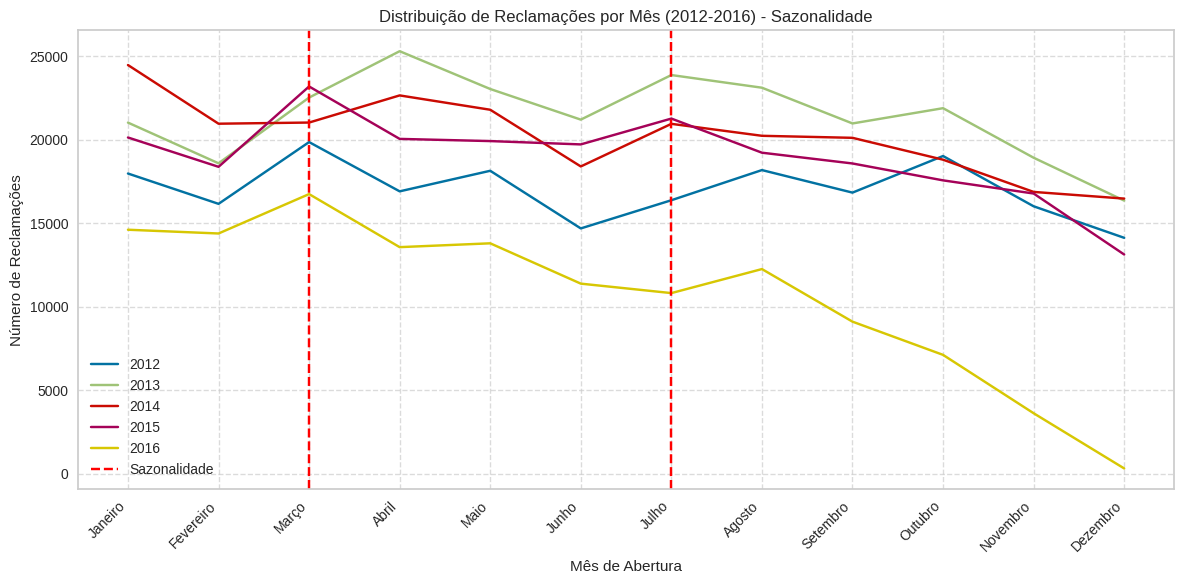

In [17]:
# Definindo os anos que irão aparecer no gráfico
anos_desejados = [2012, 2013, 2014, 2015, 2016]

# Mapeando os números do mês para os nomes em português
meses_em_portugues = {
    '01': 'Janeiro',
    '02': 'Fevereiro',
    '03': 'Março',
    '04': 'Abril',
    '05': 'Maio',
    '06': 'Junho',
    '07': 'Julho',
    '08': 'Agosto',
    '09': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

# Criando subplots para cada ano
fig, ax = plt.subplots(figsize=(12, 6))

# Escolhendo o mês para destaque
mes_destaque1 = 'Março'
mes_destaque2 = 'Julho'

for ano in anos_desejados:
    # Filtrando os dados para o ano específico
    df_ano_especifico = df_reclamacoes[df_reclamacoes['DataAbertura'].dt.year == ano]

    # Criando uma nova coluna para extrair apenas o mês
    df_ano_especifico['AnoAbertura'] = df_ano_especifico['DataAbertura'].dt.strftime('%m')

    # Aplicando o mapeamento
    df_ano_especifico['NomeMesAbertura'] = df_ano_especifico['AnoAbertura'].map(meses_em_portugues)

    # Agrupando os dados por mês e contando as reclamações
    reclamacoes_por_mes = df_ano_especifico.groupby('NomeMesAbertura').size()

    # Reordenando os meses para começar em janeiro e ir até dezembro
    reclamacoes_por_mes = reclamacoes_por_mes.reindex(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fill_value=0)

    # Plotando a linha para o ano específico
    ax.plot(reclamacoes_por_mes.index, reclamacoes_por_mes.values, label=str(ano))

# Adicionando destaque ao mês escolhido
ax.axvline(x=mes_destaque1, linestyle='--', color='red', label=f'Sazonalidade')
ax.axvline(x=mes_destaque2, linestyle='--', color='red')

# Adicionando legenda
ax.legend()

# Adicionando linhas de grade aos eixos x e y
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustando o layout
plt.xlabel('Mês de Abertura')
plt.ylabel('Número de Reclamações')
plt.title(f'Distribuição de Reclamações por Mês (2012-2016) - Sazonalidade')
plt.xticks(rotation=45, ha='right')  # Rotação do rótulo para melhor legibilidade
plt.tight_layout()
plt.show()


Nos meses de Março e Julho há um aumento nas aberturas de reclamações. Podendo, esse aumento, estar ligado ao Feriado de Carnaval (fevereiro) e Férias (Junho).

A partir de outubro nota-se uma tendência de queda na abertura de reclamações em todos os anos.


### Analisando o tempo médio de uma reclamação ativa (da abertura até a data de fechamento)

Analisamos a coluna TemporeclamacaoAtiva, que apresenta o tempo em dias em que uma reclamação fica ativa da data de abertura até o arquivamento. Inicialmente, analisamos as medidas de tendência central e identificamos os valores máximos e mínimos.

In [18]:
# Calculando o tempo médio das reclamações ativas de toda a base
tempo_medio_geral = round(df_reclamacoes.TempoReclamacaoAtiva.mean())

print(f"Tempo médio que uma reclamação ficou ativa entre 2012 até 2016: {tempo_medio_geral} dias")
print('Mediana do tempo média de uma reclamação ativa:',df_reclamacoes['TempoReclamacaoAtiva'].median(), 'dias')
print('Moda do tempo média de uma reclamação ativa:',df_reclamacoes['TempoReclamacaoAtiva'].mode()[0], 'dias')
print('Maior valor na coluna TempoReclamacaoAtiva:',df_reclamacoes['TempoReclamacaoAtiva'].max())
print('Menor valor na coluna TempoReclamacaoAtiva:',df_reclamacoes['TempoReclamacaoAtiva'].min())

Tempo médio que uma reclamação ficou ativa entre 2012 até 2016: 218 dias
Mediana do tempo média de uma reclamação ativa: 97.0 dias
Moda do tempo média de uma reclamação ativa: 34 dias
Maior valor na coluna TempoReclamacaoAtiva: 3975
Menor valor na coluna TempoReclamacaoAtiva: -18


A partir desses dados podemos levantar a hipótese de que os mesmos não seguem uma distribuição normal, pois as medidas de tendêcia central são muito diferentes. Medidas de tendência centrais iguais são uma das características da distribuição normal. Exploramos melhor essa hipótese com um histograma.

Outro ponto a ser levantado é que o menor valor dentro dessa coluna é -18, o que é inconsistente, pois estamos tratando do número de dias que uma reclamação ficou ativa, não sendo possível uma reclamação ficar ativa por dias negativos. Explorar essa observação a seguir e realizamos o tratamento necessário.

In [19]:
# Contando quantos dados possuem reclamações negativas para verificar se é viável excluirmos esses registros

print('O número de registros com TempoReclamacaoAtiva menor que 0 é ', len(df_reclamacoes[df_reclamacoes['TempoReclamacaoAtiva'] < 0]))

O número de registros com TempoReclamacaoAtiva menor que 0 é  10


In [20]:
# Observando os dados do DataFrame onde o tempo de reclamação ativa é menor que 0
df_reclamacoes.loc[df_reclamacoes['TempoReclamacaoAtiva'] < 0]

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,Tipo,NumeroCNPJ,NomeFantasiaRFB,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,TempoReclamacaoAtiva
264355,2013,2013-06-01,2013-06-04 10:12:40,3,Sudeste,ES,PONTO FRIO.COM COMERCIO ELETRONICO SA,1,3.304126e+13,NaN,S,54,Cartão de Crédito,28.0,Cobrança indevida.,M,entre 51 a 60 anos,-4
265174,2013,2013-06-01,2013-06-04 10:12:40,3,Sudeste,ES,CAIXA ECONOMICA FEDERAL,1,3.603051e+11,AGENCIA SAO MATEUS ES,S,54,Cartão de Crédito,28.0,Cobrança indevida.,M,entre 51 a 60 anos,-4
294035,2013,2013-02-01,2013-02-18 14:47:36,4,Sul,SC,CELESC DISTRIBUICAO S.A,1,8.336783e+12,CELESC DISTRIBUICAO S.A,N,185,Energia Elétrica,237.0,"SAC - Acesso ao serviço (onerosidade, problema...",M,entre 41 a 50 anos,-18
360137,2013,2013-10-01,2013-10-03 11:37:14,3,Sudeste,ES,DENTISTA POPULAR,0,8.981668e+09,NaN,S,212,Profissional Liberal - Dentista,180.0,Não cumprimento à oferta,F,entre 41 a 50 anos,-3
371708,2013,2013-02-01,2013-02-06 17:38:07,4,Sul,SC,TNL PCS S/A,1,4.164616e+12,NaN,N,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,F,entre 31 a 40 anos,-6
411971,2013,2013-02-01,2013-02-05 17:22:29,4,Sul,SC,VILA BRASIL DISTRIBUIDORA DE MANUFATURADOS LTD...,1,7.108600e+12,NaN,S,89,"Acessório Para Veículo ( Alarme, Amortecedor, ...",107.0,Não entrega/demora na entrega do produto,M,entre 21 a 30 anos,-5
478712,2013,2013-02-01,2013-02-14 14:23:07,4,Sul,SC,BANCO DO BRASIL SA,1,1.910000e+02,DIRECAO GERAL,N,53,Banco comercial,249.0,Fila em Banco,F,entre 31 a 40 anos,-14
514867,2014,2014-06-01,2014-06-03 15:23:46,3,Sudeste,MG,CASAS BAHIA COMERCIAL LTDA,1,5.929153e+13,CASAS BAHIA,N,102,Microcomputador / Produtos de Informática,105.0,Produto com vício,F,entre 41 a 50 anos,-3
514868,2014,2014-06-01,2014-06-03 15:23:46,3,Sudeste,MG,CEMAZ INDUSTRIA ELETRONICA DA AMAZONIA S/A,1,4.169843e+12,NaN,N,102,Microcomputador / Produtos de Informática,105.0,Produto com vício,F,entre 41 a 50 anos,-3
741129,2014,2014-06-01,2014-06-03 16:02:40,3,Sudeste,MG,LAURA MARIA BITENCOURT ME,1,1.877459e+13,PREPARE CURSOS E TREINAMENTOS,N,236,Cursos Livres Outros,184.0,Serviço não fornecido (entrega/instalação/não ...,N,Nao Informada,-3


No DataFrame observamos que provavelmente houve um erro de inserção nessas linhas, pois a data de arquivamento é anterior a data de abertura. Como seria impossível prever com exatidão a data de arquivamento correta, removemos esses registros.

In [21]:
# Removendo registros nos quais o TempoReclamacaoAtiva é menor que zero
df_reclamacoes = df_reclamacoes[df_reclamacoes['TempoReclamacaoAtiva'] > 0]

Com os tratamentos de valores negativos realizados, voltamos para a análise da distribuição dos dados com o histograma e Box-Plot.

<AxesSubplot: title={'center': 'Distribuição de frequências do tempo que uma reclamação fica ativa'}, xlabel='Tempo em dias que uma reclamação fica ativa', ylabel='Frequência'>

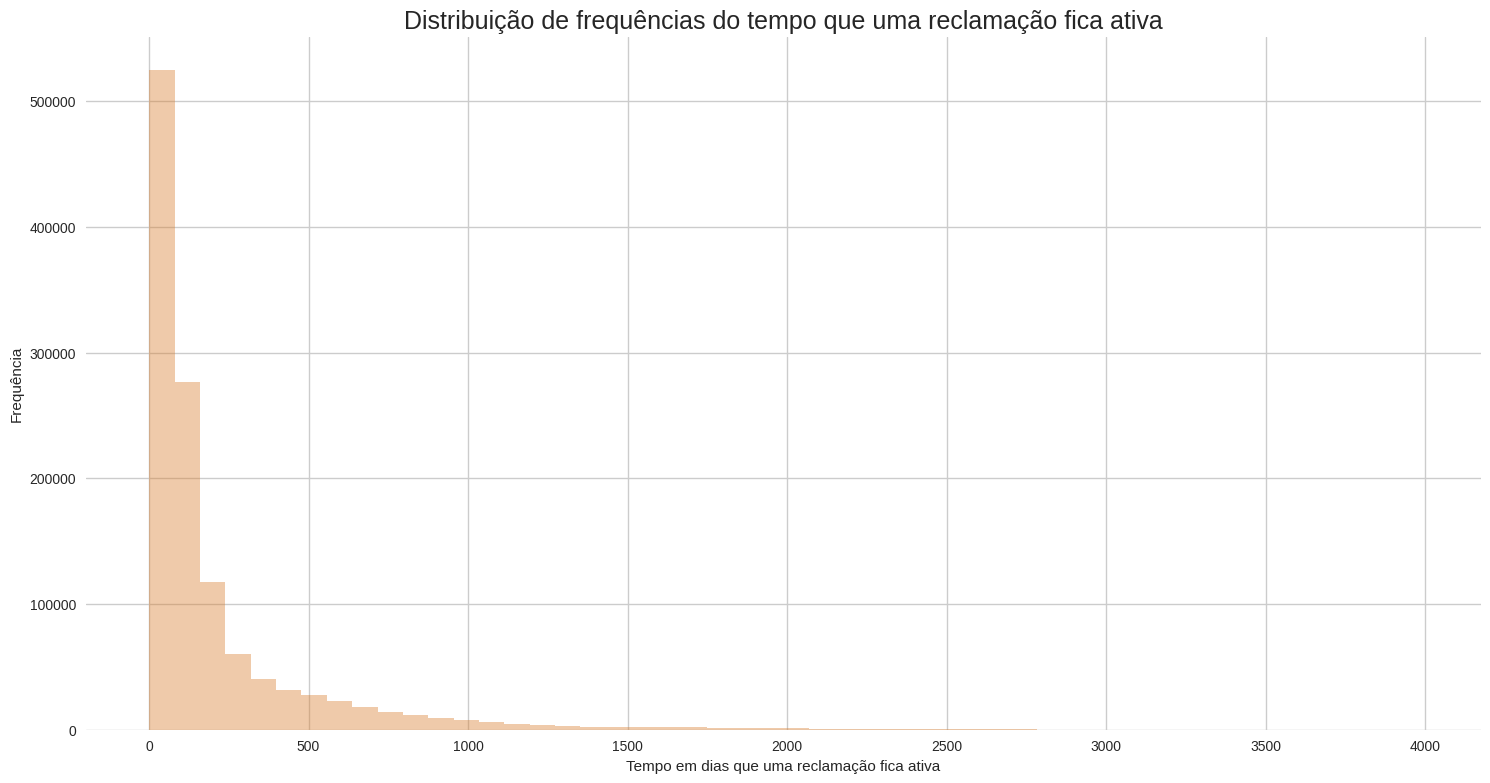

In [22]:
# Visualizando o histograma

ax = sns.distplot(df_reclamacoes['TempoReclamacaoAtiva'], color="#D97C2B", kde=False)
ax.figure.set_size_inches(18, 9)
sns.despine(left=True, bottom=True)
ax.set_title('Distribuição de frequências do tempo que uma reclamação fica ativa', fontsize=18)
plt.xlabel('Tempo em dias que uma reclamação fica ativa')
plt.ylabel('Frequência')
ax

Text(0.5, 0, 'Tempo em dias de uma Reclamação Ativa')

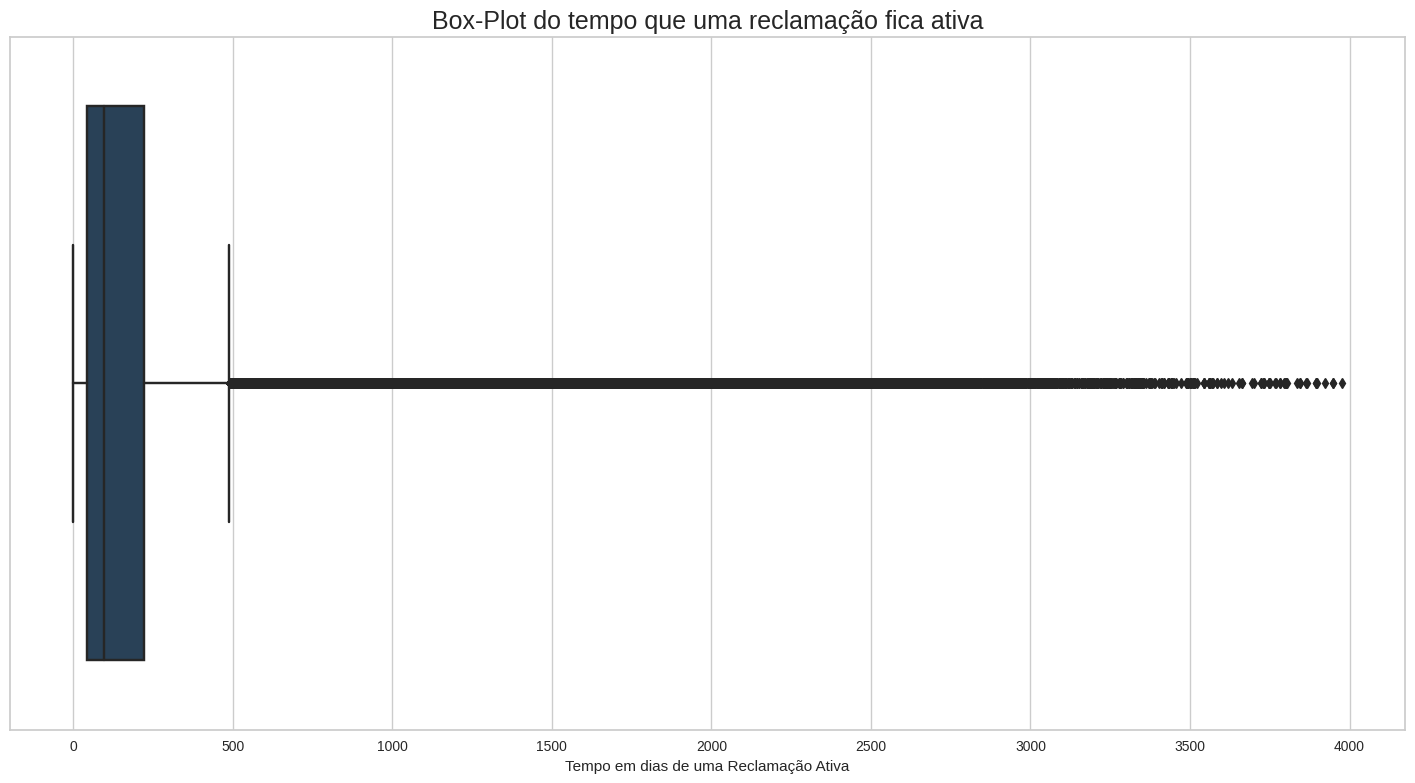

In [23]:
# plotando boxplot da variável TempoReclamaçãoAtiva

paleta_cores = ["#21425F"]
ax = sns.boxplot(data=df_reclamacoes, x='TempoReclamacaoAtiva', palette=paleta_cores)
ax.figure.set_size_inches(18, 9)
ax.set_title('Box-Plot do tempo que uma reclamação fica ativa', fontsize=18)
plt.xlabel('Tempo em dias de uma Reclamação Ativa')

Como podemos observar através do histograma e das medidas de tendência central, a distribuição da variável TempoReclamacaoAtiva não é normal. No Box-Plot notamos muitos outliers após aproximadamente 500 dias de uma reclamação

Outro ponto que podemos observar nessa variável é sua relação com a coluna Atendida, que indica se a reclamação foi solucionada ou não. Dessa forma, tentamos entender o impacto de uma reclamação ser atendida ou não no tempo que a reclamação fica ativa.

In [24]:
# Calculando o tempo médio das reclamações ativas baseadas na coluna que responde se elas foram atendidas ou não
tempo_medio_status = df_reclamacoes[['Atendida','TempoReclamacaoAtiva' ]].groupby(['Atendida']).agg('mean').round()
tempo_medio_status

,TempoReclamacaoAtiva
Atendida,
N,291.0
S,174.0


O tempo médio aberto de reclamações que não foram atendidas é de 290 dias, um valor superior ao tempo médio das reclamações atendidas, que retornou 174 dias.

Assim, analisamos esses dados também em um gráfico de barras e em um box-plot dividido pelos anos.

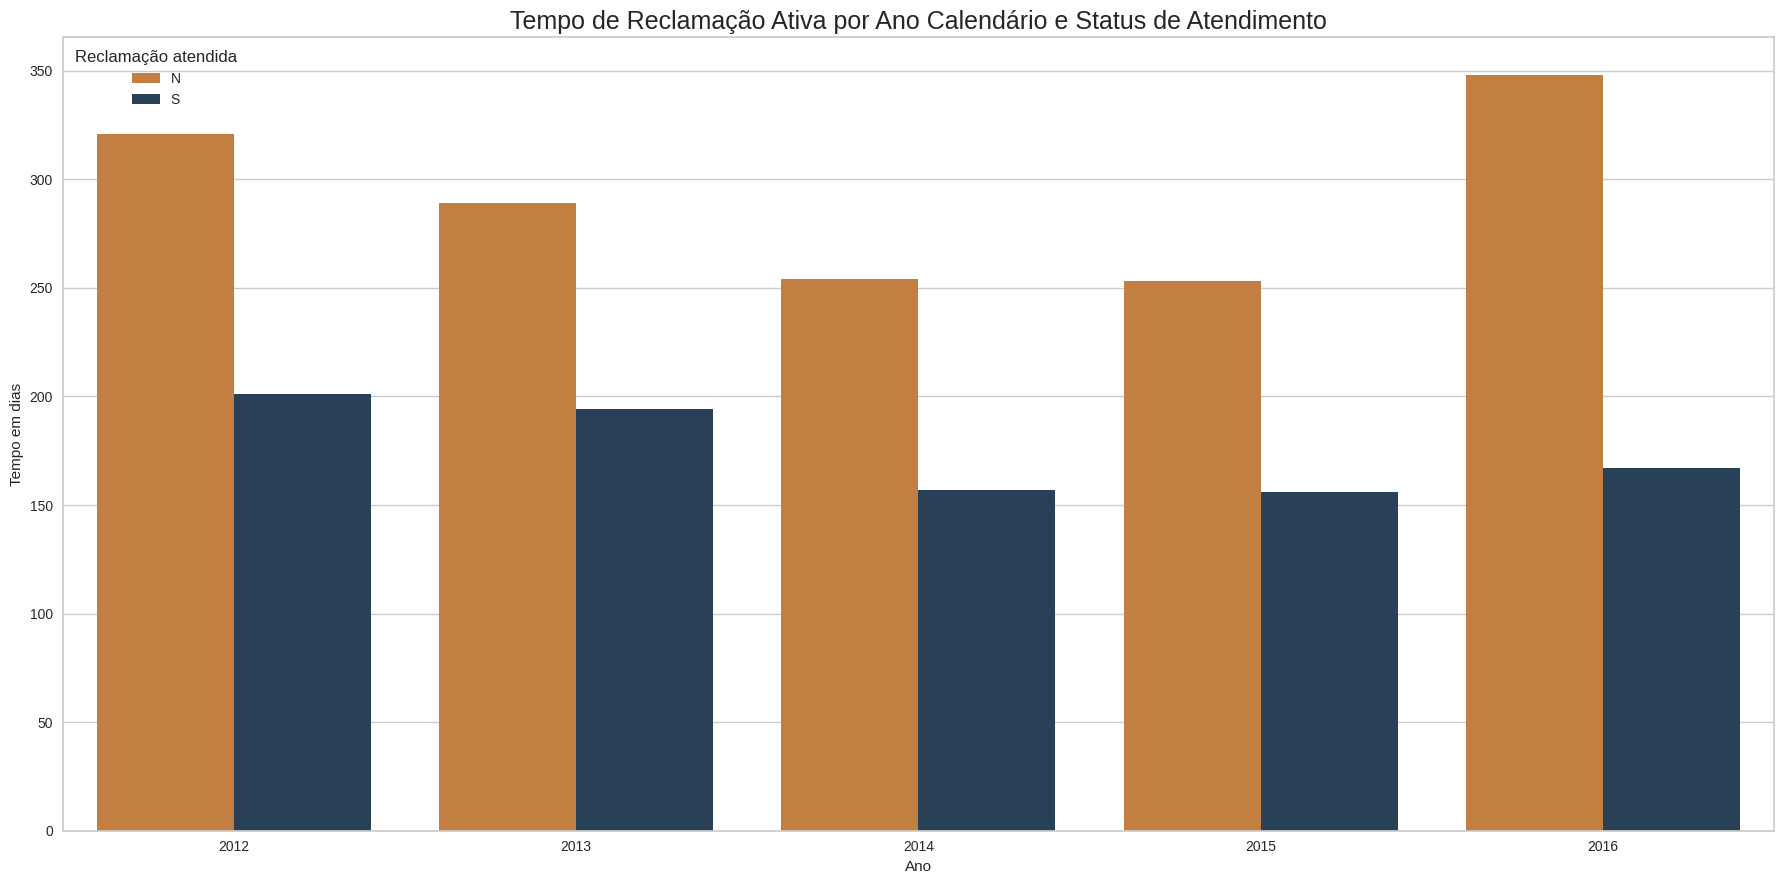

In [25]:
# Levantando o total de reclamação por ano e status
tempo_medio_status = df_reclamacoes[['AnoCalendario','Atendida', 'TempoReclamacaoAtiva' ]].groupby(['AnoCalendario', 'Atendida']).agg('mean').round()
tempo_medio_status

paleta_cores = ["#D97C2B", "#21425F"]

# Criando o gráfico de barras
tempo_medio_status = tempo_medio_status.reset_index()
plt.figure(figsize=(18, 9))
sns.barplot(x='AnoCalendario', y='TempoReclamacaoAtiva', hue='Atendida', data=tempo_medio_status, palette=paleta_cores)

# Adicionando os ítulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Tempo em dias')
plt.title('Tempo de Reclamação Ativa por Ano Calendário e Status de Atendimento', fontsize=18)

# Adicionando a legenda do status
plt.legend(title='Reclamação atendida')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

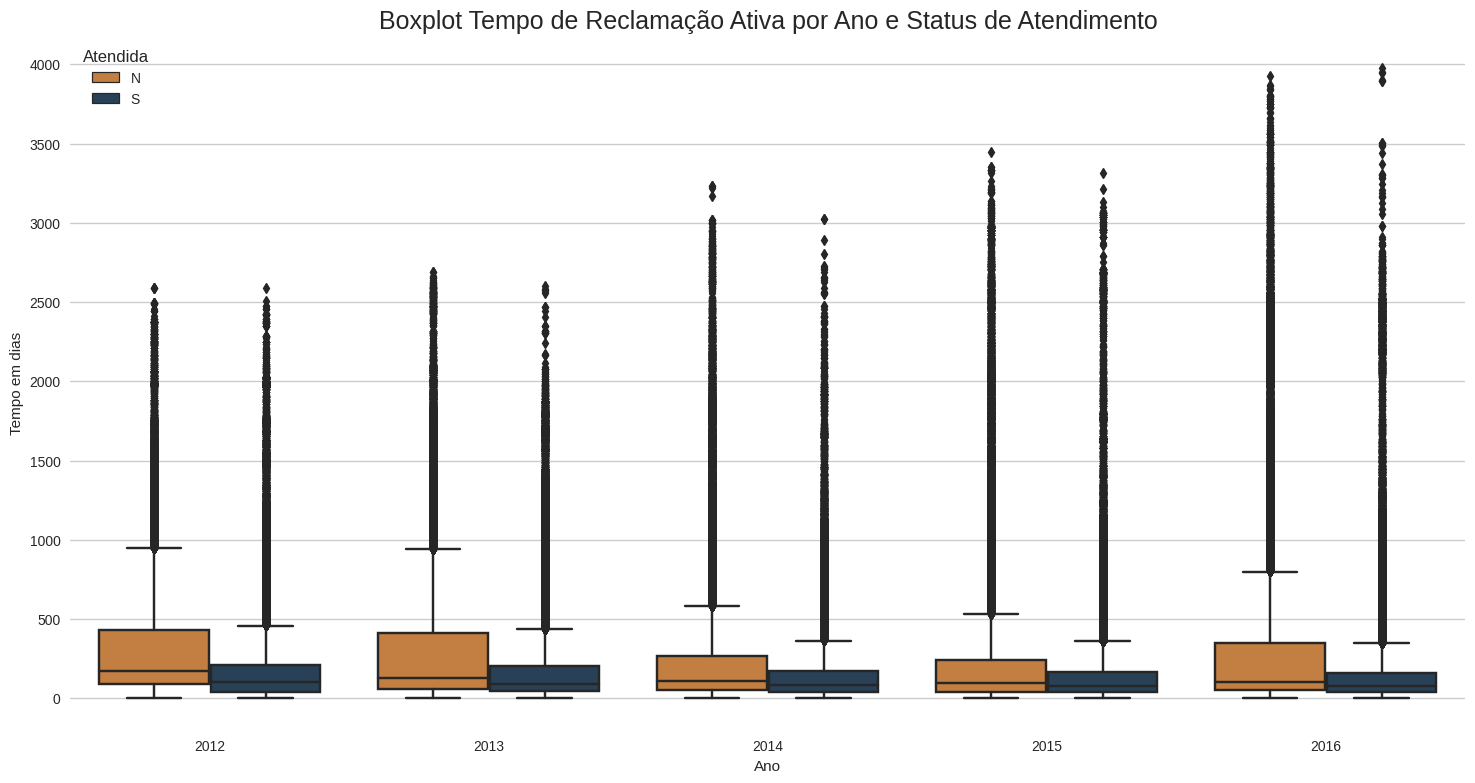

In [26]:
plt.figure(figsize=(18, 9))

# Criando uma paleta de cores
paleta_cores = ["#D97C2B", "#21425F"]

# Criando o box-plot
sns.boxplot(x='AnoCalendario', y='TempoReclamacaoAtiva', hue = 'Atendida',data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot Tempo de Reclamação Ativa por Ano e Status de Atendimento', fontsize=18)
plt.xlabel('Ano')
plt.ylabel('Tempo em dias')

plt.show()

Analisando os gráficos, percebe-se que o tempo médio que as reclamações ficam abertas mantém o padrão ao longo do tempo, com o tempo das reclamações não atendida se mantendo superior ao total das reclamações atendidas. Observamos também muitos outliers nos dados, que parecem crescer conforme os anos.

Fizemos também a análise do tempo médio das reclamações por região.

In [27]:
# Criando a tabela do Tempo de Reclamação Ativa por região
reclamacoes_regiao = df_reclamacoes[['TempoReclamacaoAtiva', 'Regiao']].groupby(['Regiao']).agg('mean').round()
reclamacoes_regiao = reclamacoes_regiao.sort_values(by='TempoReclamacaoAtiva', ascending=False)
reclamacoes_regiao

,TempoReclamacaoAtiva
Regiao,
Norte,447.0
Centro-oeste,296.0
Nordeste,209.0
Sul,164.0
Sudeste,160.0


Observa-se que a região que mais impacta o total do tempo médio é a região norte, com um tempo médio de reclamações abertas de 446 dias. A região que as reclamações ficam menos tempo ativas, em média, é a região Sudeste. Essa diferença no tempo médio entre regiões indica que a região pode ter relação com o tempo que uma reclamação ficará ativa.

### Variação do número de reclamações de acordo com características geográficas

A partir da observação anterior, procuramos entender melhor a relação entre o número de reclamações por regiões e estados.

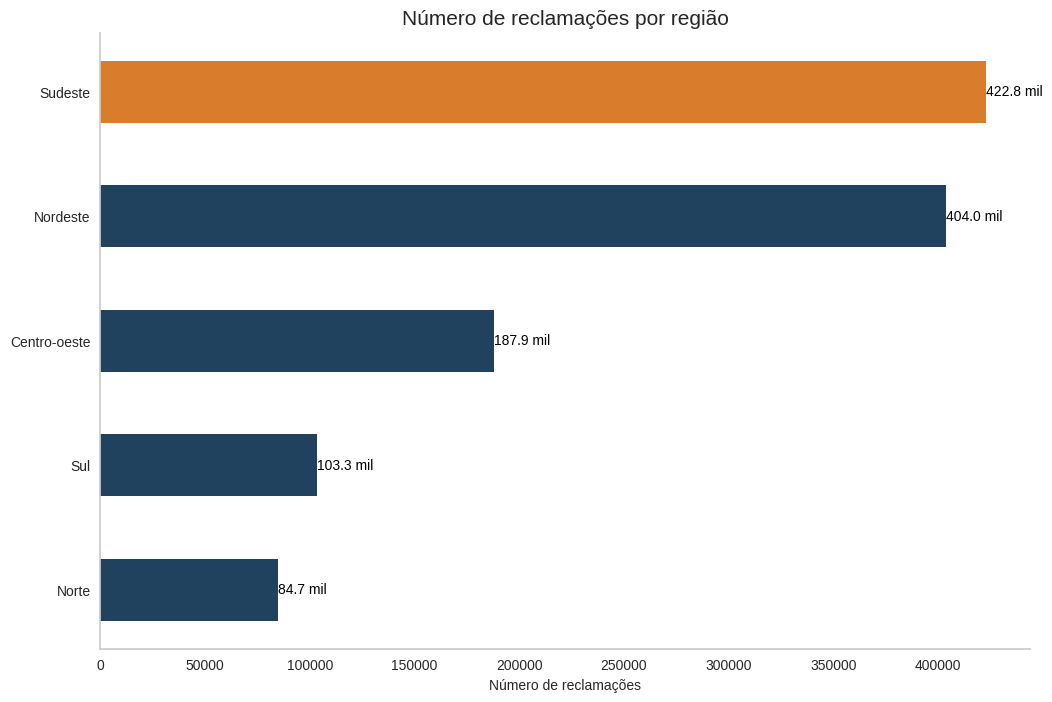

In [28]:
# Obtendo o número de reclamações por região
reclamacoes_por_regiao = df_reclamacoes.groupby('Regiao').size()

# Colocando o número de reclamações por região em ordem decrescente
reclamacoes_por_regiao = reclamacoes_por_regiao.sort_values(ascending=True)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(reclamacoes_por_regiao.index, reclamacoes_por_regiao, color='#21425F', height = 0.5)

# Destacando a região com maior número de reclamações
max_value = reclamacoes_por_regiao.max()
max_index = reclamacoes_por_regiao.idxmax()
plt.barh(max_index, max_value, color='#D97C2B', height = 0.5)

# Adicionando rótulos das barras
for index, value in enumerate(reclamacoes_por_regiao):
    plt.text(value, index, f'{value/1000:.1f} mil', color='black', va='center', fontsize=10)

# Títulos do eixo X e do gráfico
plt.title('Número de reclamações por região', fontsize=15)
plt.xlabel('Número de reclamações', fontsize=10)
plt.xticks(fontsize=10)  # Tamanho da fonte no eixo x
plt.yticks(fontsize=10)  # Tamanho da fonte no eixo y


# Retirando o grid
eixo = plt.gca()
eixo.grid(False)

# Retirando as linhas superio e direita do gráfico
eixo.spines['top'].set_visible(False)
eixo.spines['right'].set_visible(False)

Após a nossa análise, constatamos que a região com o maior número de reclamações é a Sudeste, seguida das regiões Nordeste, Centro-Oeste, Sul e Norte respectivamente.


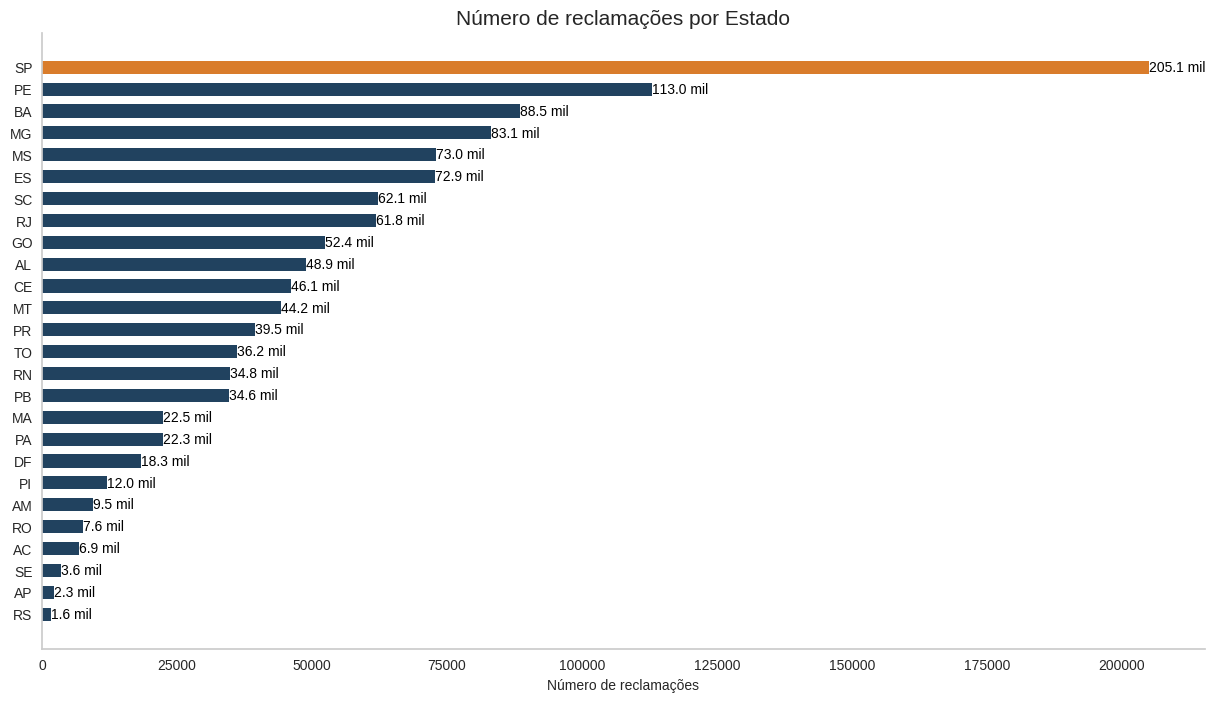

In [29]:
# Obtendo o número de reclamações por Estado
reclamacoes_por_uf = df_reclamacoes.groupby('UF').size()

# Colocando o número de reclamações por Estado em ordem decrescente
reclamacoes_por_uf = reclamacoes_por_uf.sort_values(ascending=True)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(15, 8))
plt.barh(reclamacoes_por_uf.index, reclamacoes_por_uf, color='#21425F', height = 0.6)

# Destacando o Estado com maior número de reclamações
max_value = reclamacoes_por_uf.max()
max_index = reclamacoes_por_uf.idxmax()
plt.barh(max_index, max_value, color='#D97C2B', height = 0.6)

# Adicionando rótulos das barras
for index, value in enumerate(reclamacoes_por_uf):
    plt.text(value, index, f'{value/1000:.1f} mil', color='black', va='center', fontsize=10)

# Títulos do eixo X e do gráfico
plt.title('Número de reclamações por Estado', fontsize=15)
plt.xlabel('Número de reclamações', fontsize=10)
plt.xticks(fontsize=10)  # Tamanho da fonte no eixo x
plt.yticks(fontsize=10)  # Tamanho da fonte no eixo y

# Retirando o grid
eixo = plt.gca()
eixo.grid(False)

# Retirando as linhas superio e direita do gráfico
eixo.spines['top'].set_visible(False)
eixo.spines['right'].set_visible(False)

O estado de São paulo é o que possui o maior número de reclamações, sendo bem discrepante em relação aos demais, provavelmente isso se deve ao fato de que esse é o Estado mais populoso do Brasil.

A partir das análises do número de reclamações por Regiões e Estados, procuramos entender se os resultados obtidos estão relacionados com a população média de cada Estado.

In [30]:
# Importando a base de dados da população média por Estado
populacao_media_por_estado = pd.read_csv ('populacao_media_por_estado.csv')

# Transformando reclamações por estado em um Data Frame
df_reclamacoes_por_uf = pd.DataFrame(reclamacoes_por_uf)
df_reclamacoes_por_uf= df_reclamacoes_por_uf.rename(columns={0: 'Reclamações por UF'})
df_porpulacao_media_por_uf = pd.DataFrame(populacao_media_por_estado)

# Unindo o Data frame de populção média por Estado com o de número de reclamações por Estado
df_ponderacao_reclamacoes = pd.merge(df_reclamacoes_por_uf, df_porpulacao_media_por_uf, on='UF')

# Fazendo a ponderação do número de reclamações por Estado pela população média
ponderacao = ((df_ponderacao_reclamacoes['Reclamações por UF'] / df_ponderacao_reclamacoes['PopulacaoMediaEstado']) * 1000).round(2)

# Criando a coluna ponderacoes
df_ponderacao_reclamacoes['ponderacoes'] = ponderacao

# Colocando os valores em ordem decrescente de acordo com a coluna ponderacoes
df_ponderacao_reclamacoes = df_ponderacao_reclamacoes.sort_values(by='ponderacoes', ascending=True)

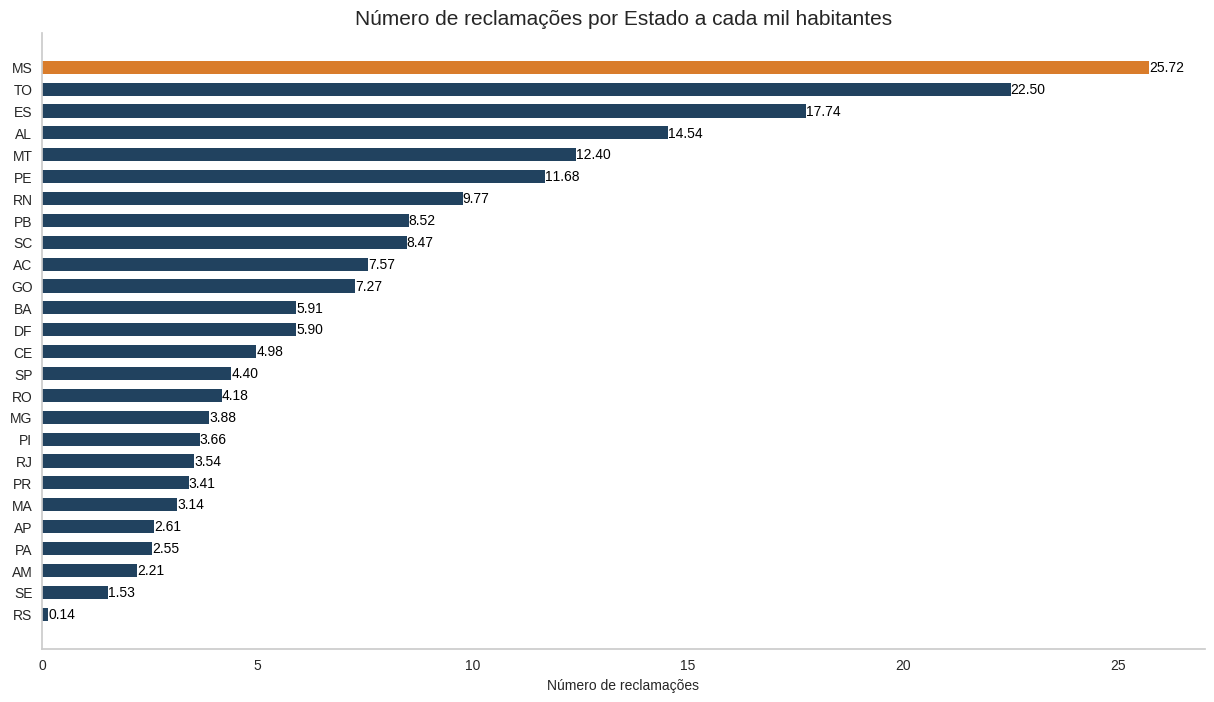

In [31]:
# Plotando o gráfico de barras horizontais
plt.figure(figsize=(15, 8))
plt.barh(df_ponderacao_reclamacoes['UF'], df_ponderacao_reclamacoes['ponderacoes'], color='#21425F', height = 0.6)

# Destacando a barra com o maior valor de uma cor diferente
max_value = df_ponderacao_reclamacoes['ponderacoes'].max()
colors = ['#21425F' if value != max_value else '#D97C2B' for value in df_ponderacao_reclamacoes['ponderacoes']]

bars = plt.barh(df_ponderacao_reclamacoes['UF'], df_ponderacao_reclamacoes['ponderacoes'], color=colors, height=0.6)

# Adicionando os rótulos nas barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

# Títulos do eixo X e do gráfico
plt.title('Número de reclamações por Estado a cada mil habitantes', fontsize=15)
plt.xlabel('Número de reclamações', fontsize=10)
plt.xticks(fontsize=10)  # Tamanho da fonte no eixo x
plt.yticks(fontsize=10)  # Tamanho da fonte no eixo y

# Retirando o grid
eixo = plt.gca()
eixo.grid(False)

# Retirando as linhas superior e direita do gráfico
eixo.spines['top'].set_visible(False)
eixo.spines['right'].set_visible(False)


Após a análise, notamos que, apesar dos Estados das regiões Sudeste e Nordeste terem os maiores números absolutos de reclamações, quando é realizada a ponderação das reclamações por Estado pela sua população média, a proporção de reclamações por número de habitantes cai consideravelmente, muito provavelmente pelo fato dessas regiões serem as mais populosas.

Isso mostra que, em relação a população média, proporcionalmente outras regiões possuem mais reclamações como a Centro-Oeste, em que o Estado do Mato Grosso do Sul apresentou o maior número de reclamações a cada mil habitantes, sendo de 25.73, o maior valor encontrado. Portanto, é interessante as empresas terem uma maior atenção para essas regiões, para entenderem o porque desses valores encontrados e tentar minimizar o número de reclamações.

### Empresas que mais receberam reclamações dos consumidores

Queremos também descobrir quais as empresas líderes em receber reclamação durante os anos que estamos explorando. Para isso, filtramos os dados pelo número do CNPJ das empresas, visto que pode haver erros de digitação ou nomes diferentes na coluna Razão Social que alterem o resultado final.

Primeiramente analisamos as empresas com mais reclamações de forma geral ao longo dos anos.

In [32]:
# Agrupando os dados pelo CNPJ para contar as reclamações por empresa
reclamacoes_por_empresa = df_reclamacoes.groupby('NumeroCNPJ').size().reset_index(name='quantidade_reclamacoes')

# Incluindo a razao social a cada CNPJ
reclamacoes_por_empresa['strRazaoSocial'] = df_reclamacoes.groupby('NumeroCNPJ')['strRazaoSocial'].first().values

# Ordenando as empresas pelo número de reclamações em ordem decrescente
reclamacoes_por_empresa = reclamacoes_por_empresa.sort_values(by='quantidade_reclamacoes', ascending=False)


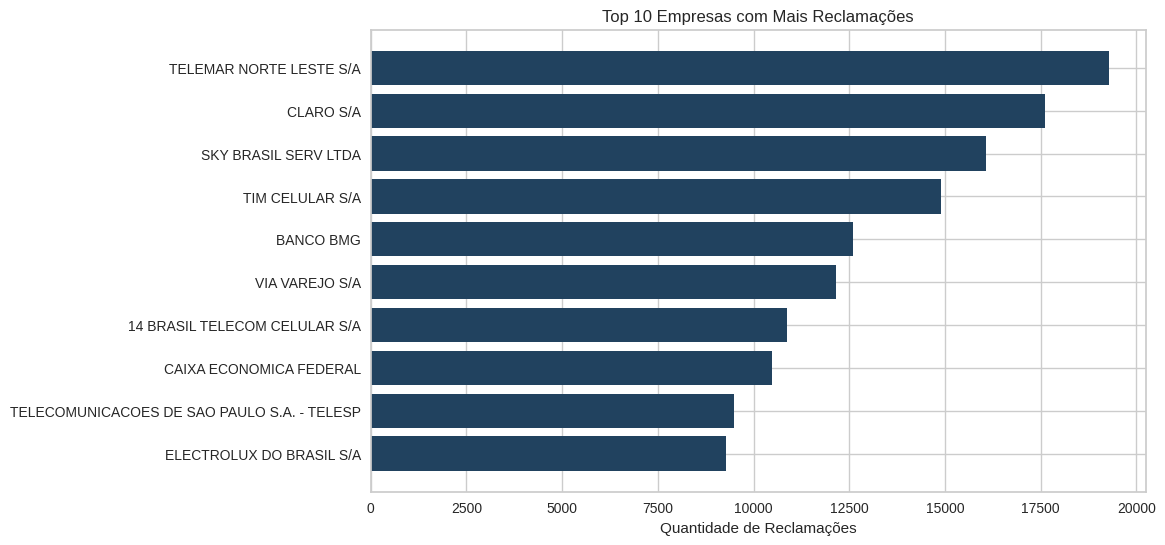

In [33]:
# selecionando as 10 empresas com mais reclamações e armazena na variavel top_empresa
top_empresas = reclamacoes_por_empresa.head(10)

# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras
plt.barh(top_empresas['strRazaoSocial'], top_empresas['quantidade_reclamacoes'], color="#21425F")
plt.xlabel('Quantidade de Reclamações')  # Rótulo do eixo x
plt.title('Top 10 Empresas com Mais Reclamações')  # Título do gráfico
plt.gca().invert_yaxis()  # Inverte a ordem das barras

plt.show()

No gráfico acima, podemos observar as empresas com mais reclamações no Brasil todo, com a Telemar Norte Leste S/A liderando.

Em seguida, verificamos essa tendência por regiões.

In [34]:
# Agrupando os dados por CNPJ, nome da empresa e região, contando as reclamações
reclamacoes_por_empresa_regiao = df_reclamacoes.groupby(['NumeroCNPJ', 'strRazaoSocial', 'Regiao']).size().reset_index(name='quantidade_reclamacoes')

# Encontrando as empresas com mais reclamações por estado
empresas_mais_reclamacoes_regiao = reclamacoes_por_empresa_regiao.groupby('Regiao').apply(lambda x: x.nlargest(1, 'quantidade_reclamacoes')).reset_index(drop=True)

# Ordenando as empresas pelo número de reclamações em ordem decrescente
empresas_mais_reclamacoes_regiao = empresas_mais_reclamacoes_regiao.sort_values(by='quantidade_reclamacoes', ascending=False)

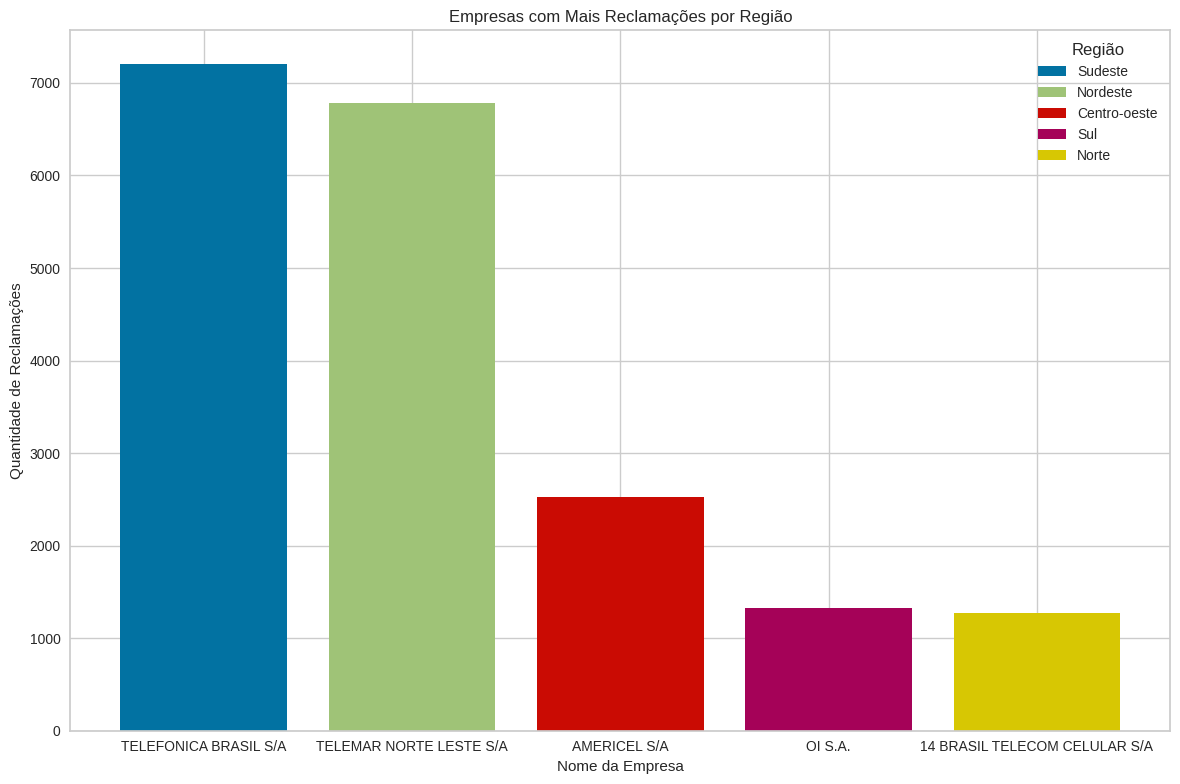

In [35]:
# Criando um gráfico de barras por região
plt.figure(figsize=(12, 8))

for index, row in empresas_mais_reclamacoes_regiao.iterrows():
    plt.bar(row['strRazaoSocial'], row['quantidade_reclamacoes'], label=row['Regiao'])

plt.xlabel('Nome da Empresa')
plt.ylabel('Quantidade de Reclamações')
plt.title('Empresas com Mais Reclamações por Região')
plt.legend(title='Região')

plt.tight_layout()

plt.show()

In [36]:
# Agrupando os dados por CNPJ, nome da empresa e estado, contando as reclamações
reclamacoes_por_empresa_estado = df_reclamacoes.groupby(['NumeroCNPJ', 'strRazaoSocial', 'UF']).size().reset_index(name='quantidade_reclamacoes')

# Encontrando as empresas com mais reclamações por estadouantidade de Reclamações
empresas_mais_reclamacoes_estado = reclamacoes_por_empresa_estado.groupby('UF').apply(lambda x: x.nlargest(1, 'quantidade_reclamacoes')).reset_index(drop=True)

# Ordenando as empresas pelo número de reclamações em ordem decrescente
empresas_mais_reclamacoes_estado = empresas_mais_reclamacoes_estado.sort_values(by='quantidade_reclamacoes', ascending=False)

# Exibindo as empresas com mais reclamações por estado
empresas_mais_reclamacoes_estado

,NumeroCNPJ,strRazaoSocial,UF,quantidade_reclamacoes
24,2.558157e+12,TELEFONICA BRASIL S/A,SP,7078
10,3.300012e+13,TELEMAR NORTE E LESTE S/A,MG,4400
18,3.304126e+13,VIA VAREJO S.A,RJ,3942
15,3.300012e+13,TELEMAR NORTE LESTE S/A - OI FIXO,PE,3580
7,3.300012e+13,TELEMAR NORTE LESTE S/A,ES,3363
4,1.350468e+13,EMPRESA BAIANA DE ÁGUAS E SANEAMENTO S/A,BA,2404
5,3.300012e+13,TELEMAR NORTE LESTE S/A,CE,2363
11,1.685903e+12,AMERICEL S/A,MS,1767
9,3.300012e+13,TELEMAR NORTE LESTE S/A,MA,1649
22,7.653576e+13,OI S.A.,SC,1323


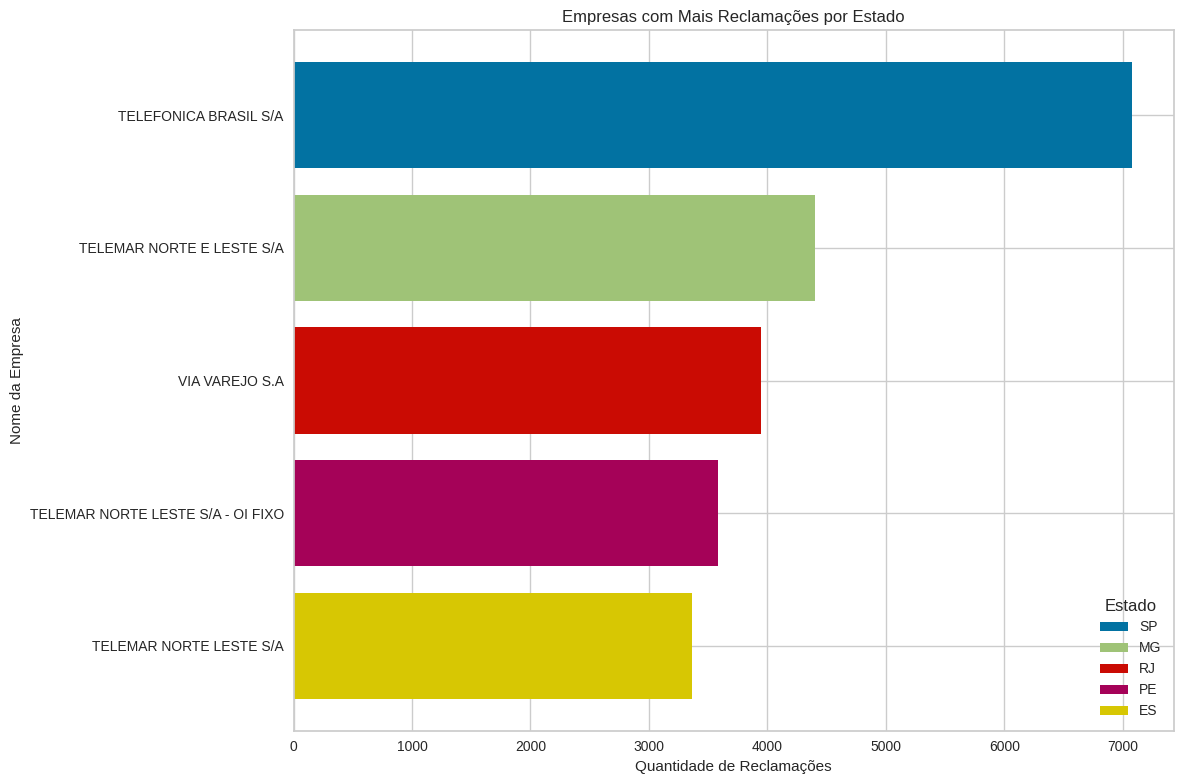

In [37]:
# selecionando as 5 empresas que concentram mais reclamações em estados diferentes
top_estado = empresas_mais_reclamacoes_estado.head(5)


# Criando o gráfico de barras
plt.figure(figsize=(12, 8))

for index, row in top_estado.iterrows():
    plt.barh(row['strRazaoSocial'], row['quantidade_reclamacoes'], label=row['UF'])

plt.xlabel('Quantidade de Reclamações')
plt.ylabel('Nome da Empresa')
plt.title('Empresas com Mais Reclamações por Estado')
plt.legend(title='Estado')

plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

## **Prevendo o tempo de uma reclamação ativa**

A partir dos dados que temos e das análises feitas, podemos usar modelos de machine learning para prever o tempo que uma reclamação ficará ativa a partir de outros dados da nossa base.

Queremos prever o tempo médio que uma reclamação ficará ativa em dias, para isso utilizaremos um modelo de regressão linear. Regressão linear é uma modelo matemático que descreve a relação entre variáveis, nos ajudando a prever valores desconhecidos (uma variável dependente) a partir de dados conhecidos (variáveis independentes).

Como anteriormente já analisamos a coluna TempoReclamacaoAtiva, que será nossa variável dependente, partimos para a análise das demais variáveis para entender quais delas podem nos ajudar com as previsões.

### Analisando as variáveis mais correlacionadas com o tempo de uma reclamação ativa

Visualizamos as correlações entre as variáveis em uma matriz de correlação, focando em descobrir quais variáveis possuem maior correlação com TempoReclamacaoAtiva

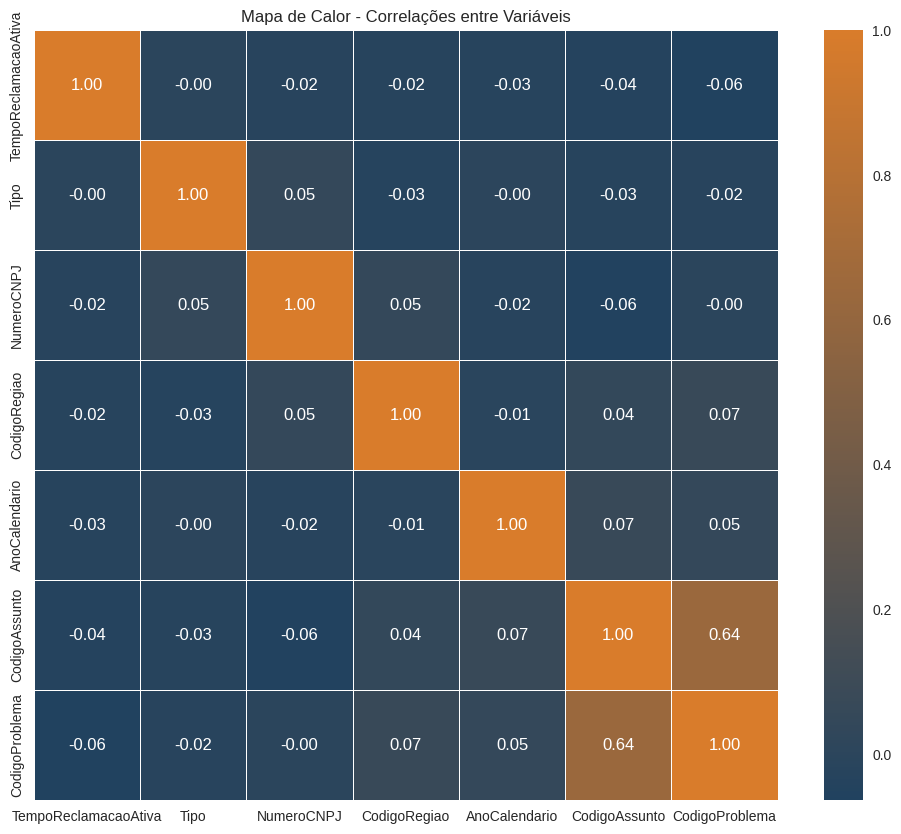

In [38]:
#criando a matriz de correlação
correlacao = df_reclamacoes.corr()

# Selecionando as variáveis númericas do modelo
variaveis = ['TempoReclamacaoAtiva', 'Tipo',  'NumeroCNPJ',
             'CodigoRegiao', 'AnoCalendario', 'CodigoAssunto',
             'CodigoProblema']

# Criando  um DF com as variáveis selecionadas
data_heatmap = df_reclamacoes[variaveis]

# Calculando a matriz de correlação
correlacao_mtz = data_heatmap.corr()


# Cores principais
cor_principal = "#21425F"
cor_adicional = "#D97C2B"

# Criando uma paleta de cores com gradiente entre a cor principal e a cor adicional
paleta_cores = sns.blend_palette([cor_principal, cor_adicional], as_cmap=True)

# Criando um mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao_mtz, annot=True, cmap=paleta_cores, fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor - Correlações entre Variáveis')
plt.show()

In [39]:
#Verificando as variáveis mais correlacionadas com o TempoReclamacaoAtiva
print("Variáveis mais correlacionadas com o TempoReclamacaoAtiva: \n")
correlacao_tempo_resolucao = correlacao['TempoReclamacaoAtiva'].sort_values(ascending=False)
print(correlacao_tempo_resolucao)

Variáveis mais correlacionadas com o TempoReclamacaoAtiva: 

TempoReclamacaoAtiva    1.000000
Tipo                   -0.004447
NumeroCNPJ             -0.018361
CodigoRegiao           -0.024256
AnoCalendario          -0.026095
CodigoAssunto          -0.041895
CodigoProblema         -0.063755
Name: TempoReclamacaoAtiva, dtype: float64


Observamos que as correlações entre as variáveis com a variável TempoReclamacaoAtiva são praticamente inexistentes por serem muito próximas de 0. Dessa forma, torna-se difícil escolher as melhores variáveis para nosso modelo a partir da correlação.

A seguir, fizemos uma análise gráfica de algumas variáveis categóricas que temos em nossa base para procurar alguma tendência que possa contribuir para o modelo, baseando-se também nas análises gráficas feitas anteriormente.



Inicialmente analisamos o tipo de reclamação, que é uma variável binária que indica se a reclamação foi aberta contra uma pessoa física (0) ou jurídica (1)

In [40]:
# Contagem de valores da variável Tipo
df_reclamacoes['Tipo'].value_counts()

1    1199366
0       3367
Name: Tipo, dtype: int64

Observamos na contagem de valores que a maioria das reclamações são abertas para empresas, com um valor pouco expressivo de reclamações abertas para pessoas físicas.

A seguir observamos o comportamento dessa variável em um box plot, para entender se há diferença no tempo que uma reclamação fica ativa de acordo com o tipo.


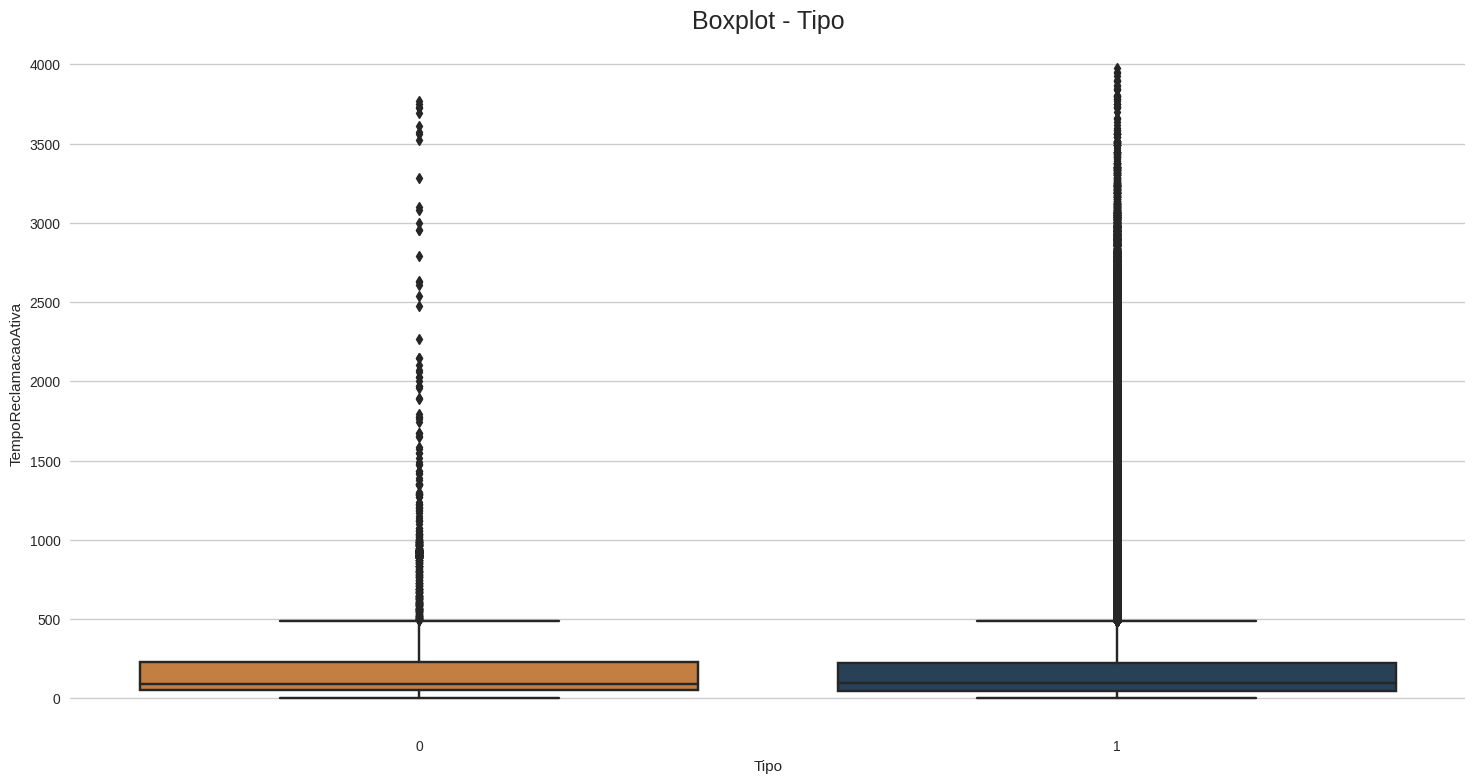

In [41]:
plt.figure(figsize=(18, 9))
# Criando uma paleta de cores
paleta_cores = ["#D97C2B", "#21425F"]

sns.boxplot(x='Tipo', y='TempoReclamacaoAtiva', data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot - Tipo', fontsize=18)
plt.xlabel('Tipo')
plt.ylabel('TempoReclamacaoAtiva')

plt.show()

Pelo Bloxpot, observamos que parece haver uma leve diferença na média entre os dois tipos, mas não vemos diferenças discrepantes.

No próximo gráfico, observamos o tempo que uma reclamação fica aberta em cada região em relação ao tipo da reclamação.

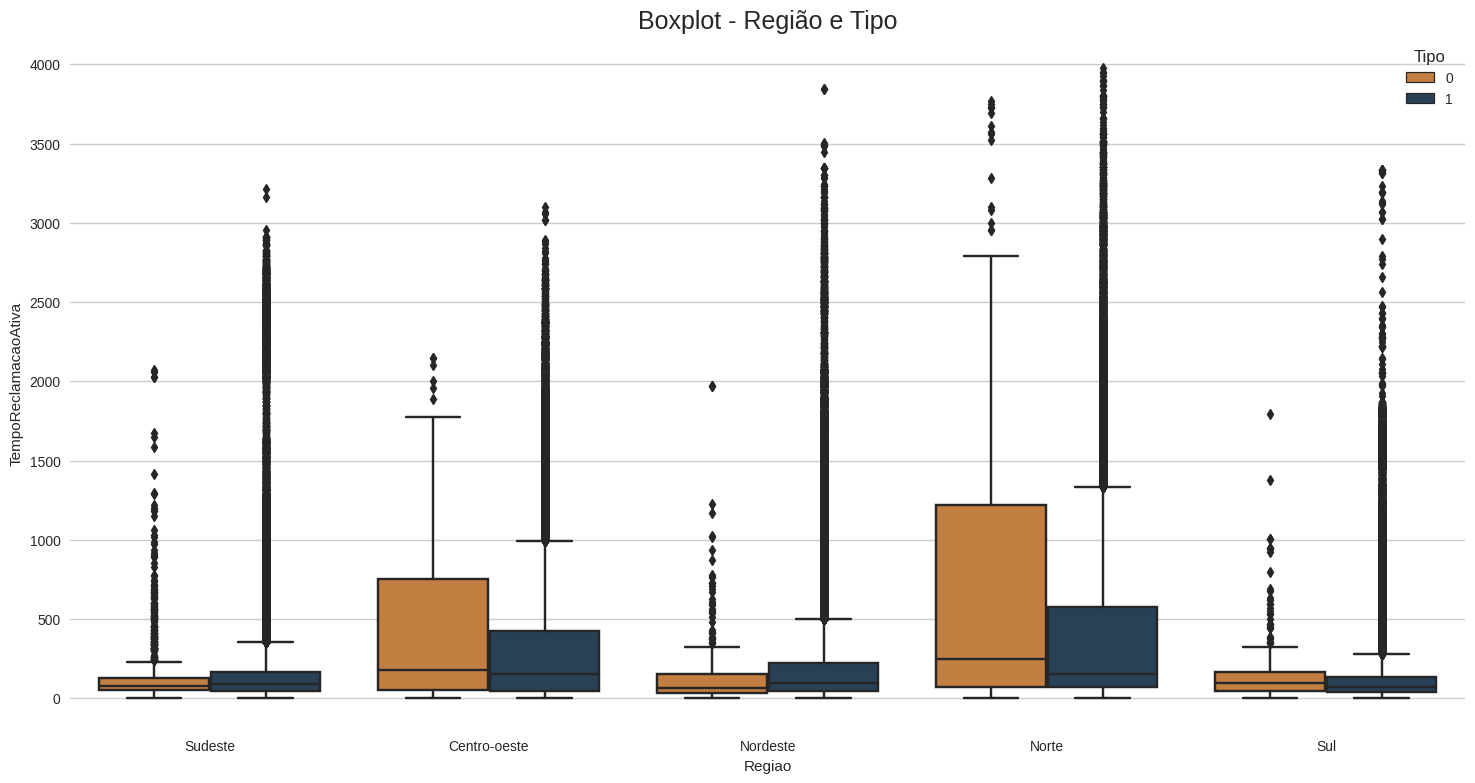

In [42]:
plt.figure(figsize=(18, 9))

# Criando uma paleta de cores
paleta_cores = ["#D97C2B", "#21425F"]

sns.boxplot(x='Regiao', y='TempoReclamacaoAtiva', hue = 'Tipo',data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot - Região e Tipo', fontsize=18)
plt.xlabel('Regiao')
plt.ylabel('TempoReclamacaoAtiva')

plt.show()

Conforme já havíamos observado anteriormente, há diferenças nas reclamações entre as regiões e as diferenças persistem nesse boxplot. Observamos que há diferenças no tempo em que uma reclamação fica ativa de acordo com seu tipo entre as regiões.

Se observando o boxplot do tipo isoladamente não havíamos percebido grandes diferenças quanto ao tipo, observando em relação a região podemos ver claramente uma grande discrepância.

Em seguida, analisamos o tempo em que uma reclamação fica ativa por região em relação a se foi atendida ou não.

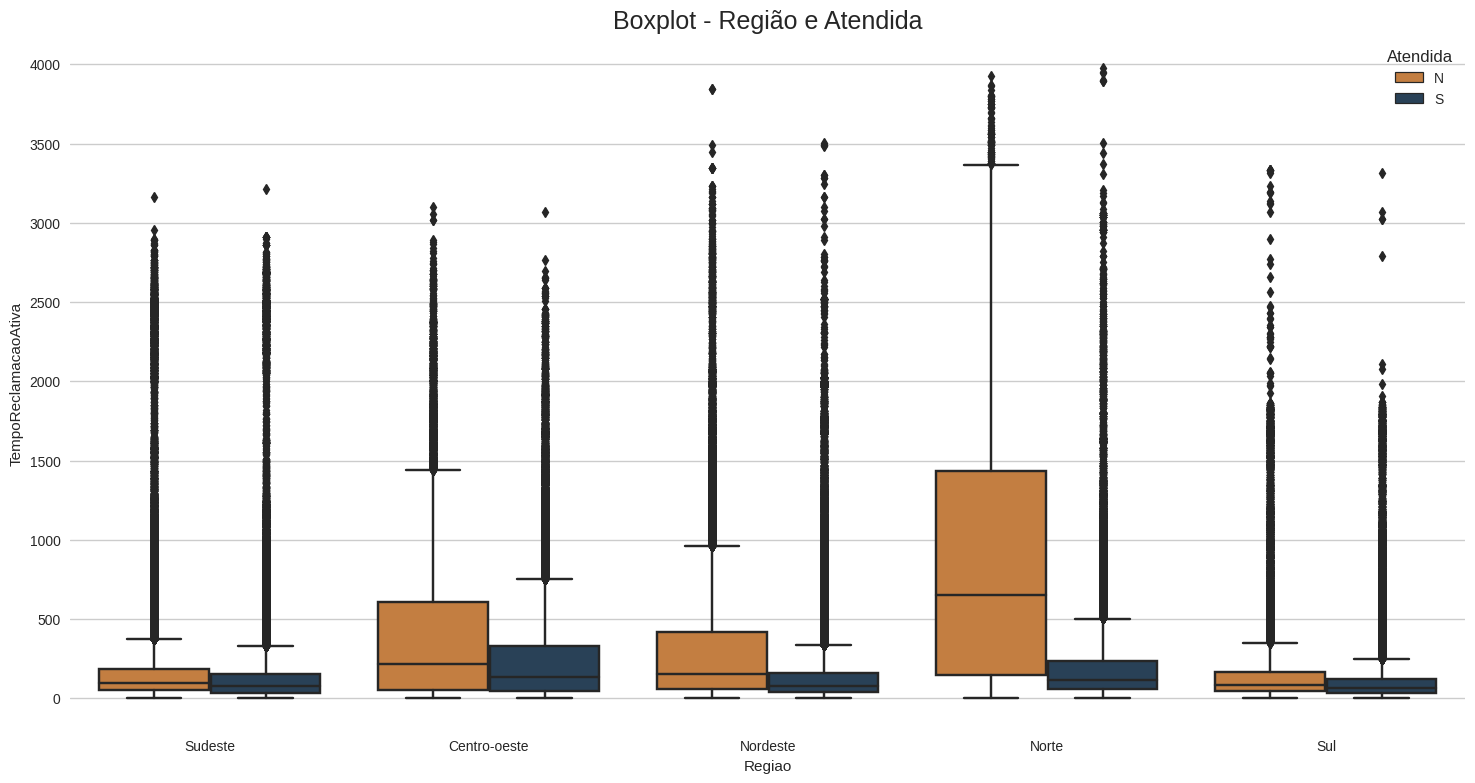

In [43]:
plt.figure(figsize=(18, 9))

# Criando uma paleta de cores
paleta_cores = ["#D97C2B", "#21425F"]

sns.boxplot(x='Regiao', y='TempoReclamacaoAtiva', hue = 'Atendida',data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot - Região e Atendida',fontsize=18)
plt.xlabel('Regiao')
plt.ylabel('TempoReclamacaoAtiva')

plt.show()

Pelo Box-Plot observamos que existe uma grande diferença no tempo que uma reclamação fica aberta entre diferentes estados. Novamente, a tendência de reclamações não atendidas terem um tempo maior aberto é mantida.

Exploramos também o comportamento das variáveis FaixaEtariaConsumidor e SexoConsumidor.

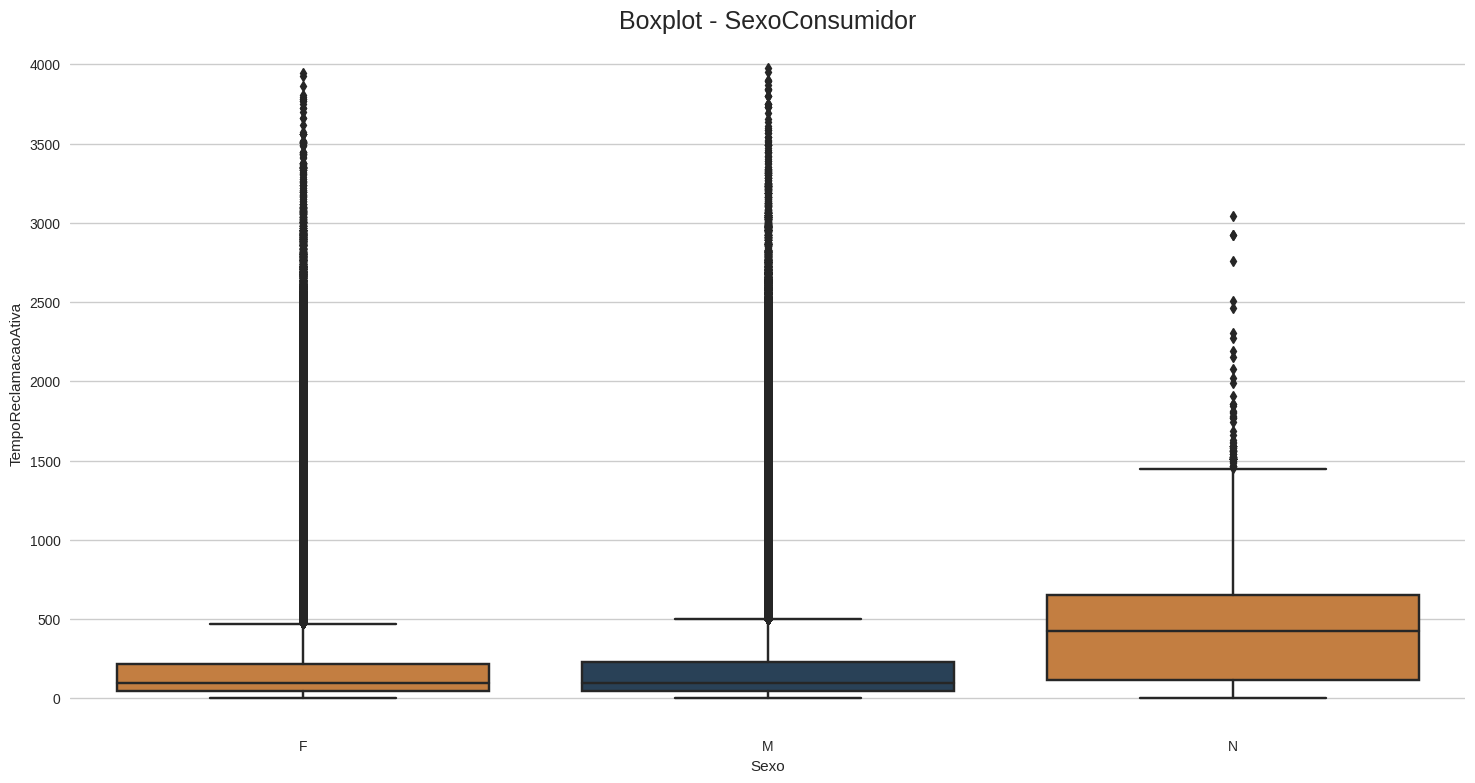

In [44]:
plt.figure(figsize=(18, 9))

# Criando uma paleta de cores
paleta_cores = ["#D97C2B", "#21425F"]

sns.boxplot(x='SexoConsumidor', y='TempoReclamacaoAtiva', data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot - SexoConsumidor',fontsize=18)
plt.xlabel('Sexo')
plt.ylabel('TempoReclamacaoAtiva')

plt.show()

No boxplot referente ao sexo do consumidor, observamos que não há uma grande diferença entre o sexo Feminino e Masculino, mas quando observamos a opção Não se aplica, vemos uma média muito maior nas reclamações ativas.
A opção Não se aplica não é especificada nas inforamções dos dados, mas pode se referir, por exemplo, a empresas que abriram reclamações.

Observamos no próximo boxplot se essa tendência se mantêm quando incluímos uma divisão pela faixa etária do consumidor.

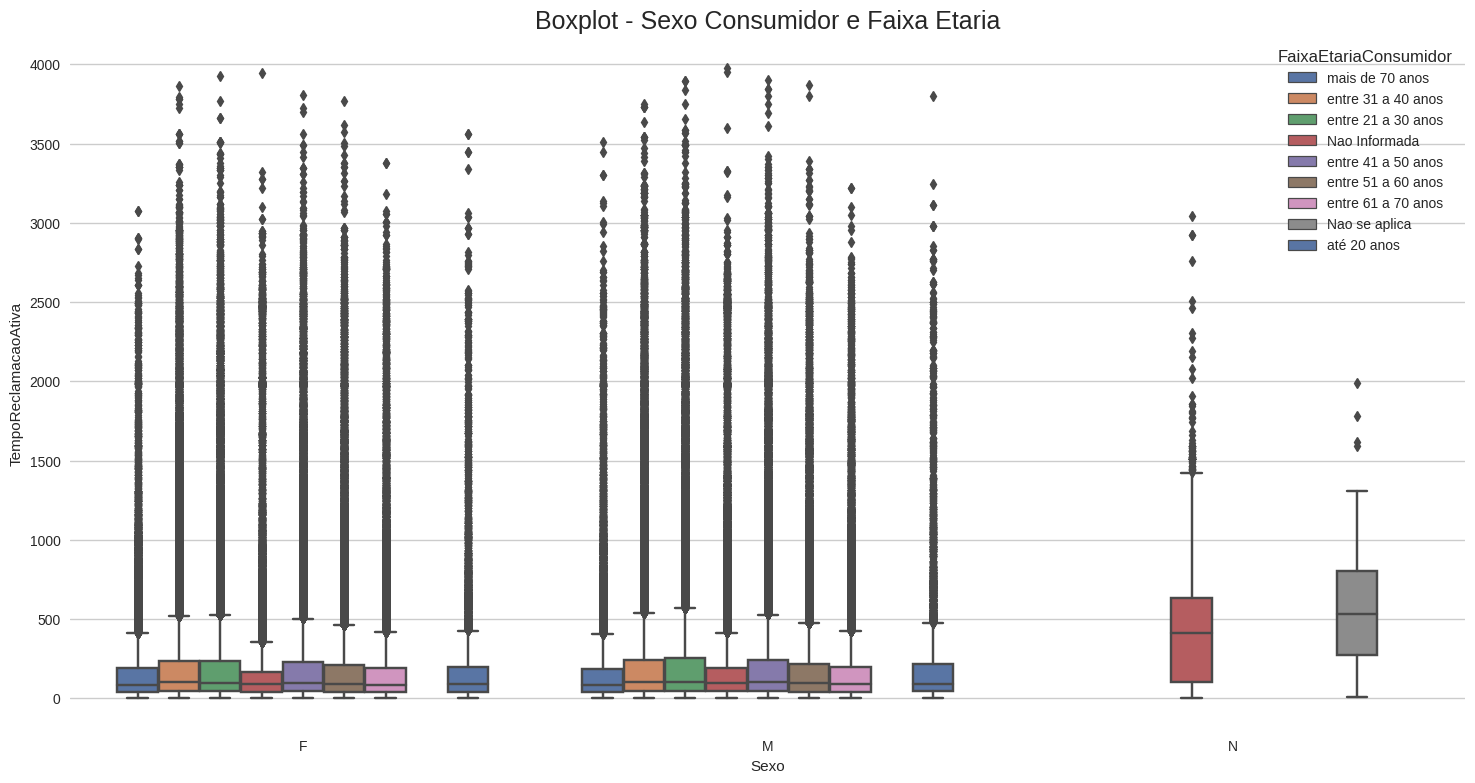

In [45]:
plt.figure(figsize=(18, 9))

# Criando uma paleta de cores
paleta_cores = sns.color_palette("deep", n_colors=8)



sns.boxplot(x='SexoConsumidor', y='TempoReclamacaoAtiva', hue='FaixaEtariaConsumidor', data=df_reclamacoes, palette=paleta_cores)
sns.despine(left=True, bottom=True)
plt.title('Boxplot - Sexo Consumidor e Faixa Etaria', fontsize=18)
plt.xlabel('Sexo')
plt.ylabel('TempoReclamacaoAtiva')

plt.show()

Com base na análise visual do boxplot,  não há uma diferença significativa no tempo de reclamação ativa entre as faixas etárias para ambos os sexos (Feminino e Masculino). As medianas estão próximas, indicando uma distribuição semelhante de dados nas diferentes faixas etárias. Novamente a faixa do Não se aplica, que não se enquadra em nenhuma faixa de idade, possui as maiores médias do tempo de reclamação.




### Construção de variáveis que podem estar correlacionadas com o tempo de uma reclamação ativa

Como não obtivemos uma boa correlação com os dados númericos existentes, criaremos a partir de outras colunas alguma variáveis que podem auxiliar na construção do modelo, principalmente a partir de variáveis categóricas que demonstraram ter uma variação significante nas análises gráficas.

A primeira váriavel criada foi uma variável dummy a partir da coluna SexoConsumidor, que observamos ter uma relevância nos box-plots.

In [46]:
# Analisando a variável para criação de variáveis dummy
# Obter a contagem de cada valor na coluna SexoConsumidor
contagem_valores = df_reclamacoes['SexoConsumidor'].value_counts()

# Imprimindo a contagem de valores
print(contagem_valores)

F    636471
M    559107
N      7155
Name: SexoConsumidor, dtype: int64


In [47]:
# Usando a função get_dummies para criar variáveis dummy com o Sexo do Consumidor
df_dummies_sexo = pd.get_dummies(df_reclamacoes['SexoConsumidor'], prefix='SexoConsumidor', drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_reclamacoes = pd.concat([df_reclamacoes, df_dummies_sexo], axis=1)

In [48]:
#Exibindo a variável criada
df_reclamacoes[['SexoConsumidor_M','SexoConsumidor_N']]

,SexoConsumidor_M,SexoConsumidor_N
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1206067,1,0
1206068,1,0
1206069,0,0
1206070,0,0


Criamos também uma variavél dummy para a coluna Regiões, pois como observamos, há uma diferença significativa no número de reclamações e na média das reclamações ativas por região.

In [49]:
# Obtendo a contagem de cada valor na coluna região
contagem_valores = df_reclamacoes['Regiao'].value_counts()

# Imprimindo a contagem de valores
print(contagem_valores)

Sudeste         422839
Nordeste        403984
Centro-oeste    187916
Sul             103289
Norte            84705
Name: Regiao, dtype: int64


In [50]:
# Usando a função get_dummies para criar variáveis dummy com as diferentes regiões
df_dummies = pd.get_dummies(df_reclamacoes['Regiao'], prefix='Regiao', drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_reclamacoes = pd.concat([df_reclamacoes, df_dummies], axis=1)

In [51]:
#Exibindo a variável criada
df_reclamacoes[['Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']]

,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
1206067,0,0,1,0
1206068,0,0,1,0
1206069,0,0,1,0
1206070,0,0,1,0


Foi criada também uma variável dummy para indicar o trimestre que a abertura foi aberta, a partir da coluna DataAbertura, já que observamos no início da nossa análise que os meses tem sim uma influência no número de abertura de reclamações. Dividimos em trimestres para diminuir o número de dummies usadas e simplificar o modelo.

In [52]:
#criando uma coluna mês
df_reclamacoes['MesAbertura'] = df_reclamacoes['DataAbertura'].dt.month

# Obtendo a contagem de cada valor na coluna mês de abertura
contagem_valores = df_reclamacoes['MesAbertura'].value_counts()


In [53]:
# Criando função para mapear os meses para trimestres
def obter_trimestre(mes):
    if mes in [1, 2, 3]:
        return 1
    elif mes in [4, 5, 6]:
        return 2
    elif mes in [7, 8, 9]:
        return 3
    elif mes in [10, 11, 12]:
        return 4
    else:
        return None

# Aplicando a função aos valores da coluna 'MesAbertura' para criar uma nova coluna 'Trimestre'
df_reclamacoes['Trimestre'] = df_reclamacoes['MesAbertura'].apply(obter_trimestre)

In [54]:
# Usando a função get_dummies para criar variáveis dummy com os diferentes trimestres
df_dummies_tri = pd.get_dummies(df_reclamacoes['Trimestre'], prefix='Trimestre', drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_reclamacoes = pd.concat([df_reclamacoes, df_dummies_tri], axis=1)

Como estamos lidando com datas, criamos também uma variável chamada FinalSemana, onde será armazenada se a reclamação foi aberta no final de semana ou não.

In [55]:
# criando coluna final de semana
df_reclamacoes['FinalSemana'] = df_reclamacoes['DataAbertura'].dt.dayofweek.isin([5, 6])

# Obtendo a contagem de cada valor na coluna final de semana
contagem_valores = df_reclamacoes['FinalSemana'].value_counts()

# Imprimindo a contagem de valores
print(contagem_valores)

False    1192361
True       10372
Name: FinalSemana, dtype: int64


Observamos que a maioria das reclamações foi feita em dias úteis. Transfomamos essa variável em dummy para usá-la no modelo.

In [56]:
# Usando a função get_dummies para criar variáveis dummy do final de semana
df_dummies_fds = pd.get_dummies(df_reclamacoes['FinalSemana'], prefix='FinalSemana', drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_reclamacoes = pd.concat([df_reclamacoes, df_dummies_fds], axis=1)

Como já utilizamos as colunas MesAbertura, Trimestre e FinalSemana, iremos removê-la.

In [57]:
# Retirando as colunas 'Mes de abertura', 'Trimestre' e 'FinalSemana', já que temos as dummies correspondentes
colunas_a_retirar = ['MesAbertura', 'Trimestre', 'FinalSemana']
df_reclamacoes = df_reclamacoes.drop(columns=colunas_a_retirar)

In [58]:
df_reclamacoes.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,Tipo,NumeroCNPJ,NomeFantasiaRFB,...,SexoConsumidor_M,SexoConsumidor_N,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,Trimestre_2,Trimestre_3,Trimestre_4,FinalSemana_True
0,2012,2012-07-13 17:44:45,2009-09-17 10:48:42,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,1,7.448120e+13,NaN,...,0,0,0,0,1,0,0,1,0,0
1,2012,2012-07-13 17:37:19,2009-09-17 10:02:24,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,1,2.802730e+11,SAMSUNG DA AMAZONIA,...,1,0,0,0,1,0,0,1,0,0
2,2012,2012-07-16 09:07:13,2009-09-17 11:36:47,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,1,3.635548e+13,NaN,...,1,0,0,0,1,0,0,1,0,0
3,2012,2012-12-10 09:05:09,2009-09-21 09:01:49,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,1,1.614079e+12,AMAZON PC,...,1,0,0,0,0,0,0,1,0,0
4,2012,2012-07-13 17:51:01,2009-09-18 17:32:22,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,1,5.444155e+12,OFFICINA REVESTIMENTOS,...,1,0,0,0,1,0,0,1,0,0


In [59]:
#Verificando tipos das variáveis

df_reclamacoes.dtypes

AnoCalendario                     int64
DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                      int64
Regiao                           object
UF                               object
strRazaoSocial                   object
Tipo                              int64
NumeroCNPJ                      float64
NomeFantasiaRFB                  object
Atendida                         object
CodigoAssunto                     int64
DescricaoAssunto                 object
CodigoProblema                  float64
DescricaoProblema                object
SexoConsumidor                   object
FaixaEtariaConsumidor            object
TempoReclamacaoAtiva              int64
SexoConsumidor_M                  uint8
SexoConsumidor_N                  uint8
Regiao_Nordeste                   uint8
Regiao_Norte                      uint8
Regiao_Sudeste                    uint8
Regiao_Sul                        uint8
Trimestre_2                       uint8


### Análise da correlação das variáveis

Com as variáveis dummies criadas, construímos novamente um mapa de calor para identificar se as dummies possuem uma melhor correlação.

In [60]:
# Selecionando as variáveis dummies
colunas_selecionadas = ['TempoReclamacaoAtiva',  'SexoConsumidor_M', 'SexoConsumidor_N', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul', 'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'FinalSemana_True']

In [61]:
# Calculando a Matriz de Correlação
correlacao = df_reclamacoes[colunas_selecionadas].corr().round(2)

In [62]:
# Cores principais
cor_principal = "#21425F"
cor_adicional = "#D97C2B"

In [63]:
# Criando uma paleta de cores com gradiente entre a cor principal e a cor adicional
paleta_cores = sns.blend_palette([cor_principal, cor_adicional], as_cmap=True)

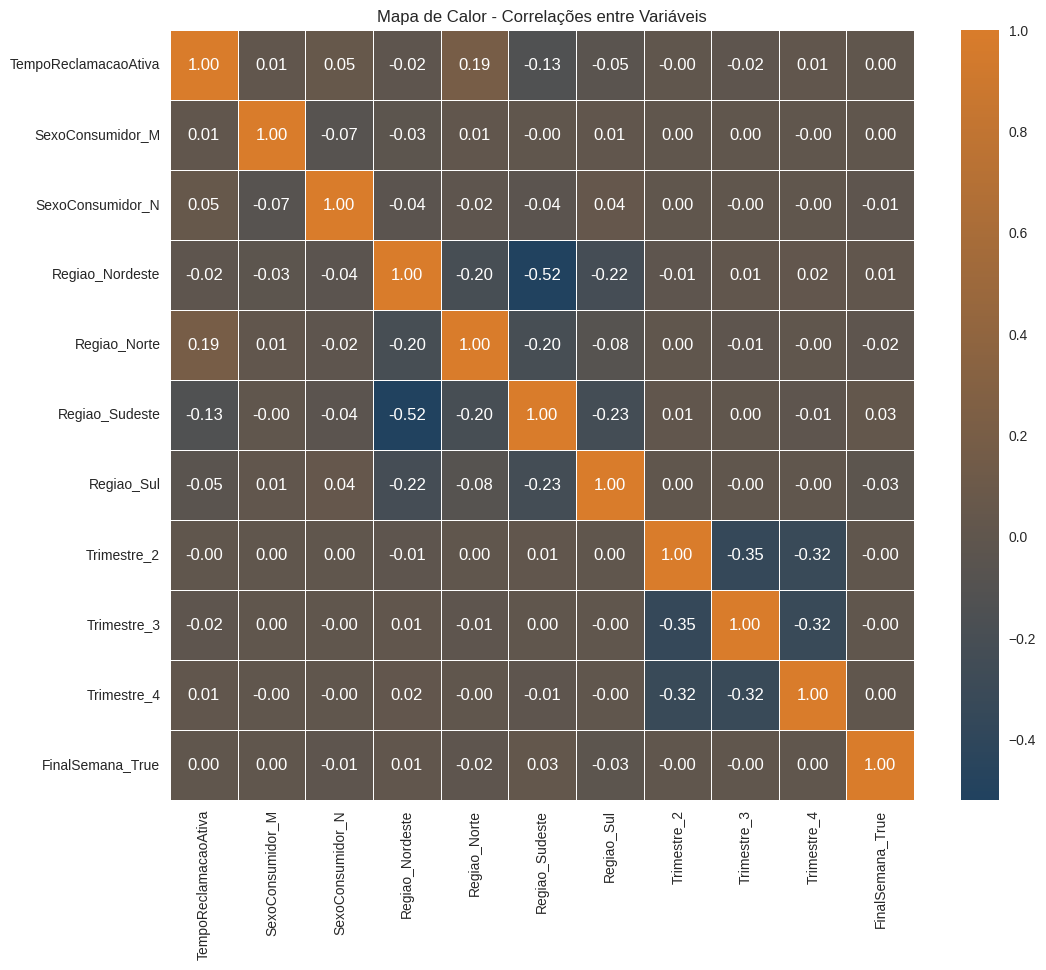

In [64]:
# Plotando Mapa de Calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap=paleta_cores, fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor - Correlações entre Variáveis')
plt.show()

In [65]:
maiores_correlacoes = correlacao['TempoReclamacaoAtiva'].sort_values(ascending=False)
maiores_correlacoes

TempoReclamacaoAtiva    1.00
Regiao_Norte            0.19
SexoConsumidor_N        0.05
SexoConsumidor_M        0.01
Trimestre_4             0.01
Trimestre_2            -0.00
FinalSemana_True        0.00
Regiao_Nordeste        -0.02
Trimestre_3            -0.02
Regiao_Sul             -0.05
Regiao_Sudeste         -0.13
Name: TempoReclamacaoAtiva, dtype: float64

Novamente, identificamos que as correlações são muito baixas e portanto não podemos nos basear nelas para escolher as melhores variáveis independentes para o modelo.

### Escolhendo as melhores variáveis para o modelo

A partir das nossas análises gráficas, acreditamos que as variáveis FinalSemana_true e as dummies da variáveis Região, MesAbertura e SexoConsumidor são as melhores para serem usadas no nosso modelo.

Utilizamos o método Recursive Feature Elimination para identificar se as variáveis que escolhemos, e outras que são elegíveis para o modelo, são consideradas relevantes por esse algoritmo para nosso modelo.

In [66]:
# Reunindo todas as variáveis possíveis para x e y
X = df_reclamacoes[['Tipo', 'CodigoProblema', 'CodigoAssunto', 'SexoConsumidor_M', 'SexoConsumidor_N',
                   'Regiao_Nordeste','Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul',
                   'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'FinalSemana_True']]
y = df_reclamacoes['TempoReclamacaoAtiva']

modelo = linear_model.LinearRegression()

# Função RFE (recursive feature elimination)
rfe = RFE(estimator=modelo, n_features_to_select=10)

# Treinamos o modelo
rfe.fit(X, y)

# Resultado do RFE

from operator import itemgetter

features = X.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 Tipo
1 SexoConsumidor_M
1 SexoConsumidor_N
1 Regiao_Nordeste
1 Regiao_Norte
1 Regiao_Sudeste
1 Regiao_Sul
1 Trimestre_2
1 Trimestre_3
1 FinalSemana_True
2 Trimestre_4
3 CodigoProblema
4 CodigoAssunto


Com base nas nossas análises gráficas e no resultado da seleção por RFE, decidimos utilizar no nosso modelo as variáveis: FinalSemana_true, Tipo e as dummies da variáveis Região, Trimestre e SexoConsumidor.

### Construindo um modelo de regressão linear para estimar o tempo de um reclamação ativa

Para prever o tempo em dias que uma reclamação ficará aberta a partir dos dados que consideramos mais relevantes para o modelo, construímos um modelo de regressão linear múltipla.

No modelo, escolhemos normalizar apenas as variáveis independentes, para garantir que estejam em uma escala comparável para o modelo. Ao normalizar a variável dependente,que não possui uma distribuição normal, através de uma transformação box-cox não obtivemos melhores resultados.

In [67]:
# Selecionando variáveis dependente (y) e independentes (x)

y = df_reclamacoes['TempoReclamacaoAtiva']
x = df_reclamacoes[['Tipo','SexoConsumidor_N','SexoConsumidor_M',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4',
                    'FinalSemana_True']]

# Divindo dados de treino e teste por
# Sendo os dados de treino utilizados dos anos 2012 a 2015 e os dados de teste do ano de 2016

dados_treino = df_reclamacoes[df_reclamacoes['AnoCalendario'].between(2012,2015)]

dados_teste = df_reclamacoes[df_reclamacoes['AnoCalendario'] == 2016]


x_treino = dados_treino[['Tipo','SexoConsumidor_N','SexoConsumidor_M',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4',
                    'FinalSemana_True']]
y_treino = dados_treino['TempoReclamacaoAtiva']

x_teste = dados_teste[['Tipo','SexoConsumidor_N','SexoConsumidor_M',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4',
                    'FinalSemana_True']]
y_teste = dados_teste['TempoReclamacaoAtiva']

# Normalizando as variáveis independentes
scaler = StandardScaler()
x_treino_scaled = scaler.fit_transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

# Criando um objeto para receber o modelo de regressão
modelo_regressao = LinearRegression()

# Inserindo os dados de treino para treinar nosso modelo
modelo_regressao.fit(x_treino_scaled, y_treino)

# Fazendo previsões nos dados de teste
previsoes = modelo_regressao.predict(x_teste_scaled)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
mae = mean_absolute_error(y_teste, previsoes)
mape = np.mean(np.abs((y_teste - previsoes) / np.abs(y_teste))) * 100

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')


MAE: 226.5570104342805
MAPE: 301.3771523944172
MSE: 179072.34723957957
R-squared: 0.053568360238235524


Avaliando o desempenho do modelo:

* O resultado do MAE, que representa média das diferenças absolutas entre as previsões do modelo e os valores reais, é um valor consideravelmente alto para os nossos objetivos. Um média de diferença de 225 dias impacta o resultado das nossas previsões negativamente. Calculando pelo MAE relativo (MAE/média dos valores reais) temos o valor de aproximadamente 1.

* O MAPE é uma métrica que expressa o erro médio como uma porcentagem do valor real teve também um resultado muito alto em relação ao desejado.

* O MSE, ou Erro Quadrático Médio, teve também um valor alto, que não é desejado no modelo de regressão linear.

* O R2 explica o ajuste do nosso modelo à reta de regressão e o ideal é que ele tenha sempre um valor próximo de 1, indicando que o modelo explica bem a variação da variável dependente e se ajusta à reta de regressão, porém obtivemos um resultado muito próximo de 0, o que mostra que o modelo não explica quase nenhuma variação na variável dependente.


Em seguida, fizemos uma análise das previsões e dos resíduos.

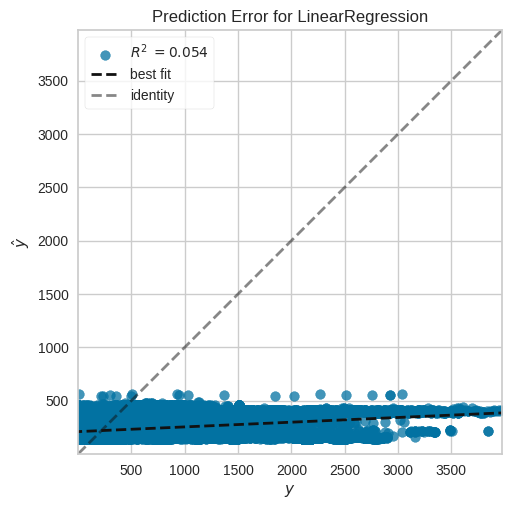

<AxesSubplot: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [68]:
# Visualizando previsões

visualizer = PredictionError(modelo_regressao)

visualizer.fit(x_treino_scaled, y_treino)  # Fit the training data to the visualizer
visualizer.score(x_teste_scaled, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

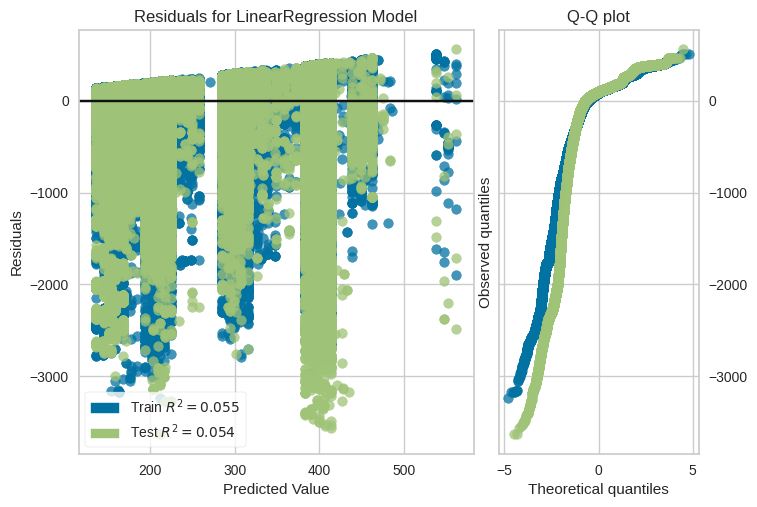

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
# Analisando resíduos
visualizer = ResidualsPlot(modelo_regressao, hist=False, qqplot=True)

visualizer.fit(x_treino_scaled, y_treino)  # Fit the training data to the visualizer
visualizer.score(x_teste_scaled, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

Observando os dados, verificamos que não tivemos um bom resultado no nosso modelo, principalmente quando analisamos o R2. O grafico que mostra as previsões do modelo comparado aos dados reais também indica que nosso modelo está muito distante do ideal. No gráfico de dispersão de resíduos verificamos uma grande dispersão e no qq-plot podemos verificar que a distribuição dos resíduos não é normal.

Esses resultados inferiores no modelo já eram esperados, já que as correlações entre as variáveis da base de dados são muito baixas e temos apenas variáveis categóricas para explicar nosso modelo.

Testamos diversos conjuntos de variáveis indepentes e também um modelo com a variável dependente normalizada através de transformações box-cox, mas não obtivemos resultados satisfatórios em nenhum caso.

Como não obtivemos um bom resultado com o modelo de regressão linear, utilizamos a biblioteca PyCaret para verificar se existem modelos de regressão ou de classificação mais adequados para realizar essa previsão

In [ ]:
# Gerando um dataframe com as variáveis que utilizaremos no nosso modelo
df_modelo = df_reclamacoes[['Tipo','SexoConsumidor_N','SexoConsumidor_M',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4',
                    'FinalSemana_True', 'TempoReclamacaoAtiva']]

df_modelo.head()

,Tipo,SexoConsumidor_N,SexoConsumidor_M,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,Trimestre_2,Trimestre_3,Trimestre_4,FinalSemana_True,TempoReclamacaoAtiva
0,1,0,0,0,0,1,0,0,1,0,0,1030
1,1,0,1,0,0,1,0,0,1,0,0,1030
2,1,0,1,0,0,1,0,0,1,0,0,1032
3,1,0,1,0,0,0,0,0,1,0,0,1176
4,1,0,1,0,0,1,0,0,1,0,0,1029


In [ ]:
# Iniciando o ambiente de treinamento
s = setup(data = df_modelo, target='TempoReclamacaoAtiva', session_id=123)

,Description,Value
0,Session id,123
1,Target,TempoReclamacaoAtiva
2,Target type,Regression
3,Original data shape,"(1202733, 12)"
4,Transformed data shape,"(1202733, 12)"
5,Transformed train set shape,"(841913, 12)"
6,Transformed test set shape,"(360820, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Comparando modelos
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:41:30
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,196.9335,105053.3808,324.1148,0.0566,1.2749,2.7354,1.9250
ridge,Ridge Regression,196.9337,105053.3806,324.1148,0.0566,1.2749,2.7354,0.5120
lar,Least Angle Regression,196.9335,105053.3808,324.1148,0.0566,1.2749,2.7354,0.5840
br,Bayesian Ridge,196.9352,105053.3800,324.1148,0.0566,1.2749,2.7354,1.0130
lasso,Lasso Regression,198.0684,105304.7121,324.5023,0.0544,1.2803,2.7455,0.8680
llar,Lasso Least Angle Regression,198.0681,105304.6809,324.5022,0.0544,1.2803,2.7455,0.4810
en,Elastic Net,203.3461,109466.3657,330.8527,0.0170,1.3117,2.8642,0.6190
omp,Orthogonal Matching Pursuit,202.6422,109562.7851,330.9983,0.0161,1.3058,2.8311,0.6450
huber,Huber Regressor,167.5591,117816.2290,343.2385,-0.0580,1.1053,1.4143,9.7210
par,Passive Aggressive Regressor,168.0508,120206.7782,346.6555,-0.0793,1.1205,1.3043,2.5240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Com os resultados dos melhores modelos de regressão do Pycaret, notamos que mesmo os modelos com resultados um pouco melhores continuam com desempenho muito inferior ao esperado, não sendo possível obter boas previsões.

Com base nas nossas análises das variáveis, dos modelos de regressão linear que testamos e do resultado do Pycaret, acreditamos que modelos de regressão não são os mais indicados para resolver esse problema. Devido ao alto número de variáveis categóricas que temos, levantamos a hipótese de que um modelo de classificação poderia se adequar melhor e nos ajudar a ter melhores previsões. Dessa forma, testamos um modelo de classificação, especificamente o modelo de regressão logística.

### Construindo um modelo de regressão logística

O modelo de regressão logística é um modelo  que prevê a classificação de uma variável dependente em função de variáveis independentes. Esse modelo se adequa melhor a variáveis categóricas, ao contrário da regressão linear.

Porém o modelo de regressão logística não prevê valores, como o tempo em dias, ele apenas dá respostas em classificações. Portanto foi necessário adequar nossa variável TempoReclamacaoAtiva para categorias.

Utilizamos uma classificação simples baseada na média de tempo que uma reclamação fica ativa, que é cerca de 220 dias. Dividimos as reclamações em atendidas dentro do prazo (entre 0 e 220 dias) e fora do prazo (maior que 220 dias).

Devido as limitações de memória RAM do Colaboratory, separamos uma amostra aleatória dentro do DataFrame, com um número definido de 30 mil registros por ano.

In [70]:
# Observando o tamanho original do DataFrame
df_reclamacoes.shape

(1202733, 28)

In [71]:
# Amostragem de 30000 registros de cada ano
df_reclamacoes_reduzido = pd.concat([df_reclamacoes[df_reclamacoes['AnoCalendario'] == ano].sample(30000, random_state=32) for ano in range(2012, 2017)])
df_reclamacoes_reduzido.reset_index(inplace=True)
df_reclamacoes_reduzido.head()

,index,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,Tipo,NumeroCNPJ,...,SexoConsumidor_M,SexoConsumidor_N,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,Trimestre_2,Trimestre_3,Trimestre_4,FinalSemana_True
0,208837,2012,2012-03-31 11:32:06,2006-10-17 16:07:33,2,Nordeste,AL,MOTOROLA DO BRASIL LTDA,1,6.228858e+13,...,1,0,1,0,0,0,0,0,1,0
1,98882,2012,2012-04-27 13:09:34,2012-02-16 12:33:39,2,Nordeste,CE,NATURE MÓVEIS LTDA,1,1.135812e+13,...,1,0,1,0,0,0,0,0,0,0
2,167379,2012,2012-12-07 16:46:08,2012-10-10 10:11:13,3,Sudeste,SP,EDUARDO ROSSANEZ INFORMATICA - EPP,1,4.502774e+12,...,1,0,0,0,1,0,0,0,1,0
3,36849,2012,2012-04-12 10:50:44,2011-03-14 16:48:42,5,Centro-oeste,MT,OLYMPUS OPTICAL DO BRASIL LTDA.,1,4.937243e+12,...,1,0,0,0,0,0,0,0,0,0
4,45763,2012,2012-08-01 12:58:08,2012-06-29 11:30:55,2,Nordeste,PE,CONSORCIO NACIONAL SUZUKI MOTOS LTDA,1,NaN,...,1,0,1,0,0,0,1,0,0,0


In [72]:
# Observando o tamanho do novo DataFrame reduzido
df_reclamacoes_reduzido.shape

(150000, 29)

In [73]:
# Definindo os intervalos e categorias
intervalos = [0,220, float("inf")]
categorias = ['Dentro do prazo', 'Fora do prazo']

# Criando a nova coluna com as categorias
df_reclamacoes_reduzido['TempoReclamacaoCategoria'] = pd.cut(df_reclamacoes_reduzido['TempoReclamacaoAtiva'], bins=intervalos, labels=categorias, right=False)

In [74]:
# Transformando em categorias numéricas

# Mapeando categorias com números correspondentes
mapeamento_categorias = {'Dentro do prazo': 0, 'Fora do prazo': 1}

# Substituindo os valores na coluna TempoReclamacaoCategoria
df_reclamacoes_reduzido['TempoReclamacaoCategoriaValor'] = df_reclamacoes_reduzido['TempoReclamacaoCategoria'].replace(mapeamento_categorias)


In [75]:
# Exibindo o resultado
df_reclamacoes_reduzido[['TempoReclamacaoAtiva', 'TempoReclamacaoCategoria', 'TempoReclamacaoCategoriaValor']]

,TempoReclamacaoAtiva,TempoReclamacaoCategoria,TempoReclamacaoCategoriaValor
0,1991,Fora do prazo,1
1,71,Dentro do prazo,0
2,58,Dentro do prazo,0
3,394,Fora do prazo,1
4,33,Dentro do prazo,0
...,...,...,...
149995,63,Dentro do prazo,0
149996,35,Dentro do prazo,0
149997,228,Fora do prazo,1
149998,118,Dentro do prazo,0


In [76]:
df_reclamacoes_reduzido['TempoReclamacaoCategoriaValor'] = df_reclamacoes_reduzido['TempoReclamacaoCategoriaValor'].astype('uint8')

In [77]:
df_reclamacoes_reduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          150000 non-null  int64         
 1   AnoCalendario                  150000 non-null  int64         
 2   DataArquivamento               150000 non-null  datetime64[ns]
 3   DataAbertura                   150000 non-null  datetime64[ns]
 4   CodigoRegiao                   150000 non-null  int64         
 5   Regiao                         150000 non-null  object        
 6   UF                             150000 non-null  object        
 7   strRazaoSocial                 149999 non-null  object        
 8   Tipo                           150000 non-null  int64         
 9   NumeroCNPJ                     143499 non-null  float64       
 10  NomeFantasiaRFB                67844 non-null   object        
 11  

Com as novas colunas criadas, observamos a proporção de dados entre as categorias.

In [78]:
df_reclamacoes_reduzido['TempoReclamacaoCategoria'].value_counts()

Dentro do prazo    111962
Fora do prazo       38038
Name: TempoReclamacaoCategoria, dtype: int64

No subconjunto de dados que geramos notamos que cerca de 75% das reclamações foram atendidas dentro do prazo que estipulamos, ou seja, a maior parte do nosso dataset. Isso pode gerar um desbalanceamento no nosso modelo, pois ele terá uma tendência a acertar mais na classe majoritária. Dessa forma, realizamos no final do modelo um ajuste no ponto de corte para encontrar um ponto ideal para previsões mais assertivas.

Antes, novamente usamos o método de seleção RFE para entender se as variáveis independentes que utilizamos no modelo de regressão linear seguem sendo as melhores quando temos uma variável dependente binária.

In [79]:
# Reunindo todas as variáveis possíveis para x e y
X = df_reclamacoes_reduzido[['Tipo', 'CodigoProblema', 'CodigoAssunto', 'SexoConsumidor_M', 'SexoConsumidor_N',
                   'Regiao_Nordeste','Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul',
                   'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'FinalSemana_True']]
y = df_reclamacoes_reduzido['TempoReclamacaoCategoriaValor']

# Seleção de variáveis utilizando eliminação recursiva

modelo = LogisticRegression()

# Função RFE (recursive feature elimination)
rfe = RFE(estimator=modelo, n_features_to_select=10)

# Treinamos o modelo
rfe.fit(X, y)

#Resultado do RFE

from operator import itemgetter

features = x_treino.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 Tipo
1 Regiao_Nordeste
1 Regiao_Norte
1 Regiao_Sudeste
1 Trimestre_2
1 Trimestre_3
1 Trimestre_4
1 FinalSemana_True
2 Regiao_Sul
3 SexoConsumidor_N
4 SexoConsumidor_M


Com base no resultado do RFE, verificamos que as melhores variáveis independentes a serem usadas nesse modelo são Tipo e as dummies de Região, Trimestre e SexoConsumidor.

Tendo a variável dependente categórica e as variáveis independentes definidas, construímos o modelo de regressão logística.

In [80]:
# Selecionando variáveis dependente (y) e independentes (x)

y = df_reclamacoes_reduzido['TempoReclamacaoCategoriaValor']
x = df_reclamacoes_reduzido[['Tipo',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'SexoConsumidor_M', 'SexoConsumidor_N']]

# Divindo dados de treino e teste
# Sendo os dados de treino utilizados dos anos 2012 a 2015 e os dados de teste do ano de 2016

dados_treino = df_reclamacoes_reduzido[df_reclamacoes_reduzido['AnoCalendario'].between(2012,2014)]

dados_teste = df_reclamacoes_reduzido[df_reclamacoes_reduzido['AnoCalendario'].between(2015,2016)]

x_treino = dados_treino[['Tipo',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'SexoConsumidor_M', 'SexoConsumidor_N']]
y_treino = dados_treino['TempoReclamacaoCategoriaValor']

x_teste = dados_teste[['Tipo',
                    'Regiao_Nordeste', 'Regiao_Norte','Regiao_Sudeste','Regiao_Sul',
                    'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'SexoConsumidor_M', 'SexoConsumidor_N']]
y_teste = dados_teste['TempoReclamacaoCategoriaValor']

In [81]:
# Normalizando as variáveis independentes para diminuir o impacto dos outliers
scaler = StandardScaler()
x_treino_scaled = scaler.fit_transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

# Criando o modelo de regressão logística
modelo_classificacao = LogisticRegression()
modelo_classificacao.fit(x_treino_scaled, y_treino)

# Fazendo previsões com os dados de teste
y_previsto = modelo_classificacao.predict(x_teste_scaled)

# Métricas para avaliar o desempenho do modelo
accuracy = accuracy_score(y_teste, y_previsto)
print(f'Acurácia do modelo: {accuracy:.2f}')

precision = precision_score(y_teste, y_previsto)
print(f'Precisão: {precision:.2f}')

recall = recall_score(y_teste, y_previsto)
print(f'Revocação: {recall:.2f}')

f1 = f1_score(y_teste, y_previsto)
print(f'F1-Score: {f1:.2f}')



Acurácia do modelo: 0.78
Precisão: 0.87
Revocação: 0.02
F1-Score: 0.04


Avaliação das métricas do modelo:

* A acurácia representa a proporção de predições corretas em relação ao total de predições feitas. Um resultado de 0.78 está bem próximo de 1, o que indica que o modelo está acertando grande parte das previsões. Isso sugere um bom desempenho do modelo.

* A precisão é uma métrica relacionada a quantidade de vezes que o modelo acerta que o tempo da reclamação estará dentro do prazo. Tivemos um bom resultado nessa métrica.

* A revocação está relacionada a quantas vezes o modelo acerta em identificar corretamente que o tempo da reclamação está fora do prazo. Nesse contexto, um baixo valor de revocação significa que o modelo está perdendo muitos casos em que a reclamação não será atendida dentro do prazo, o que consideramos indesejado.

* O F1-Score é uma métrica que combina informações da precisão e revocação, nos permitindo verificar se há equilíbrio entre essas métricas. No caso do nosso modelo, vemos que não tivemos um bom desempenho nessa métrica por conta da diferença entre o valor da precisão e revocação.

Em vista dessas métricas, este modelo não está satisfatório e iremos procurar o melhor ponto de corte para melhorar a sensibilidade e obter melhores resultados.

In [82]:
# Função para definir o melhor ponto de corte
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])


In [83]:
# Probabilidade do resultado ser fora do prazo
y_pred_prob = modelo_classificacao.predict_proba(x_teste_scaled)[:, 1]

In [84]:
# Calculando ponto de corte
ponto_corte = Find_Optimal_Cutoff(y_teste, y_pred_prob)
ponto_corte


[0.27413118037781536]

In [85]:
# Calculando novas previsões
previsto = (y_pred_prob > ponto_corte).astype(int)

In [86]:
# Calculando métricas
accuracy = accuracy_score(y_teste, previsto)
print(f'Acurácia do modelo: {accuracy:.2f}')

precision = precision_score(y_teste, previsto)
print(f'Precisão: {precision:.2f}')

recall = recall_score(y_teste, previsto)
print(f'Revocação: {recall:.2f}')

f1 = f1_score(y_teste, previsto)
print(f'F1-Score: {f1:.2f}')

Acurácia do modelo: 0.64
Precisão: 0.33
Revocação: 0.55
F1-Score: 0.41


Com o ajuste do modelo de acordo com o novo ponto de corte, podemos fazer a seguinte análise das métricas

* Houve uma diminuição da acurácia do modelo.

* A precisão se tornou mais baixa, como já esperávamos. Porém a métrica que consideramos mais importante no nosso modelo, que é revocação, teve uma grande melhora.

* O F1-Score nos mostra que agora temos as métricas de precisão e revocação muito mais equilibradas.

Dessa forma, acreditamos que esse modelo se encaixa melhor no objetivo de prever reclamações com menos falsos negativos.



Analisamos também a matriz de confusão desse modelo.

A Matriz de confusão é uma tabela que nos mostra a performance de um modelo de classificação, sendo que a diagonal principal representa as predições corretas (verdadeiros positivos e verdadeiros negativos), enquanto os elementos fora da diagonal principal representam as predições incorretas (falsos positivos e falsos negativos).



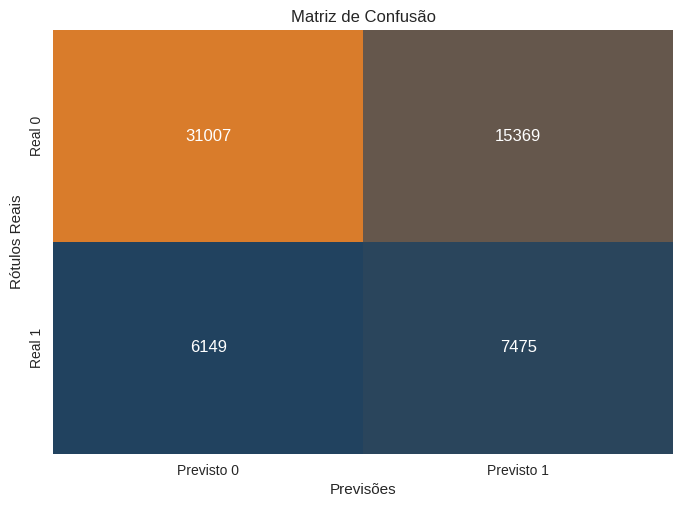

In [87]:
conf_matrix = confusion_matrix(y_teste, previsto)

# Cores principais
cor_principal = "#21425F"
cor_adicional = "#D97C2B"

# Criando uma paleta de cores com gradiente entre a cor principal e a cor adicional
paleta_cores = sns.blend_palette([cor_principal, cor_adicional], as_cmap=True)

# Visualizando a matriz de confusão usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=paleta_cores, cbar=False, xticklabels=['Previsto 0', 'Previsto 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Previsões')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()

* No quadrante Real 0 x Previsto 0 estão as ocorrências corretamente  classificadas como "Dentro do prazo".

* No quadrante Real 1 x Previsto 1 estão as ocorrências corretamente classificadas como "Fora do prazo".

* No quadrante Real 0 x Previsto 0 estão as ocorrências classificadas incorretamente como Fora do prazo.

* No quadrante Real 1 x Previsto 0 estão as ocorrências classificadas incorretamente como Dentro do Prazo.

Na matriz de confusão identificamos que o modelo teve um desempenho razoável, com mais acertos do que erros, mas o número de ocorrências de classificações como Dentro do Prazo incorretas ainda são altas, chegando muito próximo do número de acertos.

Em geral, avaliando todas as métricas, acreditamos que esse modelo está satisfatório para nossos objetivos e comprovou nossa hipótese de que podemos ter um melhor resultado com modelos de classificação do que com modelos de regressão linear nesse contexto.

Em versões futuras do modelo pode ser testado diferentes técnicas de balaceamento de dados, tentativas de treinar o modelo com mais dados para tentar obter um melhor resultado ou análises mais aprofundadas para definir uma nova data de prazo e melhorar a precisão do modelo.